C. Skov "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

### References
1. https://www.researchgate.net/publication/282133920_Predicting_Movie_Success_Based_on_IMDB_Data
2. http://cs229.stanford.edu/proj2013/EricsonGrodman-APredictorForMovieSuccess.pdf
3. https://iopscience.iop.org/article/10.1088/1742-6596/1000/1/012100/pdf
4. https://nycdatascience.com/blog/student-works/web-scraping/movie-rating-prediction/
5. https://data.world/saipranav/top-rated-english-movies-of-this-decade-from-imdb
6. http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

# 1. Business understanding
## Summary of Business Problem
For this project I will be looking at data from IMDB and determining which variables predict movie success. Movie success will be determined by an IMDB rating of 5 or higher [4]. Since the US is the "third most prolific producer of films in the world" I plan to isolate only the English language movies and movies wh's country of origin is the US [1, 5]. IMDB provides a lot of valuable information for our research such as titles, year made, directors, actors, run time, just to name a few. IMDB ratings are based on the number of users who vote on a movie, this could be a valualbe piece of information in the dataset. Through this analysis I will clean up the data set and show vital visualizations that will show the key variables for high IMDB ratings. 

## Project’s Goals
The main goal of this project is to identify variables that contribute to making a successful movie [6]. A successful movie is defined by having a IMDB rating of 5 or higher. 
1. Describe what impact social media likes have on IMDB scores  [5].
2. Show the affect of movie profit on IMDB score [4].
3. Investigate movie genres and ratings and the affect on IMDB score [4].
 

## Types of Data Collection Needed
For this project to predict how well a movie will perform in theaters, the kinds of data I would collect would include: 
- movie profit 
- social media likeability 
- critic and viewers ratings 
- movie genre 
- actors social media likes
- director social media likes
- movie ratings

## Variables correlated to imdb score
My hypothesis is that the following variables are correlated to imdb, through data analysis I will be able to confirm or deny that these are correct.
- social media likeability
- number of voting users
- genre and ratings
- profit

## 2. Data Understanding

In [208]:
#import packages
import requests
from lxml import html
import csv
import pandas as pd
import numpy as np

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

pd.set_option('display.max_columns', 500)

### 2.a. Collect Initial Data

In [209]:
#import data
df = pd.read_csv("data/movie_metadata.csv")
df.head(2)

color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   

  actor_1_name                                movie_title  num_voted_users  \
0  CCH Pounder                                    Avatar            886204   
1  Johnny Depp  Pirates of the Caribbean: At World's End            471220   

   cast_total_facebook_likes    actor_3_name  facenumber_in_poster  \
0                       4834       Wes Studi                   0.0   
1                      48350  Jack Davenport                   0.0   

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0

### 2.b. Describe Data

In [210]:
# check column names, number of observations, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [211]:
#describe numerical data
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

### 2.c. Explore Data

In [212]:
# number of unique values in column
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [213]:
#find duplicate
df[df.duplicated()]
len(df)

5043

In [214]:
#drop duplicate rows
df = df.drop_duplicates()
len(df)

4998

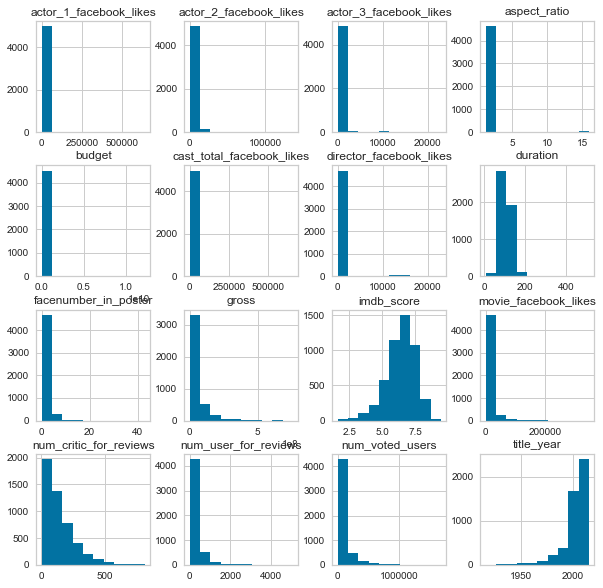

In [215]:
#histogram of numerical data types
df.hist(figsize=(10,10));

In [216]:
#describe a single categorical column for country
df['country'].describe()

count     4993
unique      65
top        USA
freq      3773
Name: country, dtype: object

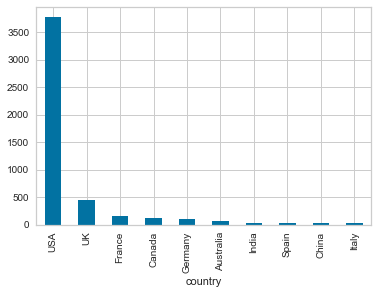

In [217]:
#bar plot for country
df.groupby('country').size().sort_values(ascending=False).head(10).plot(kind='bar');

In [218]:
#describe a single categorical column language
df['language'].describe()

count        4986
unique         47
top       English
freq         4662
Name: language, dtype: object

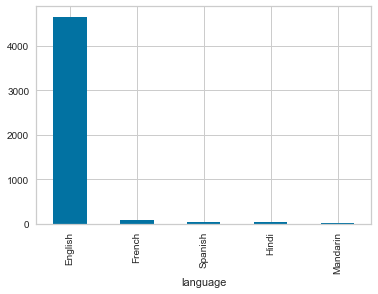

In [219]:
#bar graph for language
df.groupby('language').size().sort_values(ascending=False).head().plot(kind='bar')

The max budget seems really high so doing some reasearch I found it should be close to 12 million dollars so I will update this in the data set (https://en.wikipedia.org/wiki/The_Host_(2006_film))

### 2.d. Verify Data Quality
### Describe data
- There are 5043 entries in the dataset
- There are 28 columns 
### Identify data quality issues
- 21 of the categories have missing data including
- gross has the most missing entires with 884
### Identify data types
- Numerical columns: 12 of the categories are objects
- Categorical columns: 16 of the categories are integers or floats
### Identify value counts of a selective list of columns considered to be important to predict a movie’s success (imdb_score)
Looking at the histogram some of the important predictors of movie success might be:
- num_critic_for_reviews
- title_year
- duration
- country
- language
- the country with the most movies is the USA with 3,773 movies
- the most popular language is Enlgish with 4,662 movies
- the average budget for movies is $339,747,870.00
- the max budget for a movie is $12,000,000,000
- the minimum budget for a movie is 218.00
- the average release year for movies is 2002
- the oldest movie is 1916
- the most current movie is 2016

The budget numbers seem too high and too low. In preparing the data I will see what happens with the budget and do more data preparation if necessary. 

## 3. Data preparation

### 3.a. Select Data
Looking at the missing values in the data set gross has the most missing data at 874 missing entries. Since this is a very important column and the information would be inaccurate if we tried to replace with the mean value, so it would be more accurate to remove these columns. For all of the missing data it would be more accurate to remove all missing data, there would have to be a lot of research to make sure replacing the missing data is accurate. 

In [220]:
# check missing values
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

With over 4998 entries we can drop the null values and still have a very strong data set. 

### 3.b. Clean Data

In [221]:
# remove empty rows we don't need missing data for this analysis
# create new variable 
dp = df.dropna()

In [222]:
# check missing values
dp.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [223]:
#dataset information
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-

My new dataset (dp) has 3723 entries. This is 75% of the data set. 

In [224]:
#how many values in 'color' column
dp.groupby('color').size()

color
 Black and White     123
Color               3600
dtype: int64

Change 'color' column to integer. Since it has 2 unique values this would be a good variable to convert to an integer for easy correlation later on. 

In [225]:
#replace (Black and White to 0, Color to 1)
dp = dp.replace({'color': {' Black and White': 0, 'Color': 1}})
dp.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    
3        Tom Hardy                     The Dark Knight Rises    
5     Daryl Sabara                               John Carter    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
5           212204                       1873          Polly Walker   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
5                   1.0  alien|american civil war|male nipple|mars|prin...   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
5  http://www.imdb.com/title/tt0401729/?ref_=fn_t...                 738.0   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
5  English     USA          PG-13  263700000.0      2012.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
5                   632.0         6.6          2.35                 24000

In [226]:
#check dataset info
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
color                        3723 non-null int64
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-n

In [227]:
# summary statistics for numerical columns
dp.describe()

color  num_critic_for_reviews     duration  \
count  3723.000000             3723.000000  3723.000000   
mean      0.966962              167.040559   110.263497   
std       0.178759              123.345135    22.678325   
min       0.000000                2.000000    37.000000   
25%       1.000000               77.000000    96.000000   
50%       1.000000              138.000000   106.000000   
75%       1.000000              224.000000   120.000000   
max       1.000000              813.000000   330.000000   

       director_facebook_likes  actor_3_facebook_likes  \
count              3723.000000             3723.000000   
mean                809.864357              765.010207   
std                3076.624412             1868.841589   
min                   0.000000                0.000000   
25%                  11.000000              194.000000   
50%                  63.000000              436.000000   
75%                 235.000000              690.000000   
max               23000.000000            23000.000000   

       actor_1_facebook_likes         gross  num_voted_users  \
count             3723.000000  3.723000e+03     3.723000e+03   
mean              7743.335751  5.248034e+07     1.055543e+05   
std              15557.953218  6.980333e+07     1.515651e+05   
min                  0.000000  1.620000e+02     9.100000e+01   
25%                744.500000  8.124330e+06     1.959850e+04   
50%               1000.000000  3.005003e+07     5.397700e+04   
75%              13000.000000  6.690181e+07     1.285240e+05   
max             640000.000000  7.605058e+08     1.689764e+06   

       cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
count                3723.000000           3723.000000           3723.000000   
mean                11494.966694              1.376041            335.897663   
std                 19113.274232              2.045134            411.078619   
min                     0.000000              0.000000              4.000000   
25%                  1907.000000              0.000000            109.000000   
50%                  4050.000000              1.000000            209.000000   
75%                 16232.500000              2.000000            398.000000   
max                656730.000000             43.000000           5060.000000   

             budget   title_year  actor_2_facebook_likes   imdb_score  \
count  3.723000e+03  3723.000000             3723.000000  3723.000000   
mean   4.623049e+07  2002.965351             2009.926403     6.465673   
std    2.269511e+08     9.892253             4531.151446     1.053644   
min    2.180000e+02  1927.000000                0.000000     1.600000   
25%    1.000000e+07  1999.000000              383.500000     5.900000   
50%    2.500000e+07  2004.000000              683.000000     6.600000   
75%    5.000000e+07  2010.000000              975.000000     7.200000   
max    1.221550e+10  2016.000000           137000.000000     9.300000   

       aspect_ratio  movie_facebook_likes  
count   3723.000000           3723.000000  
mean       2.110682           9299.497717  
std        0.353879          21426.654643  
min        1.180000              0.000000  
25%        1.850000              0.000000  
50%        2.350000            226.000000  
75%        2.350000          11000.000000  
max       16.000000         349000.000000

In [228]:
#remove IMDB link column from data set
dp=dp.drop('movie_imdb_link', axis=1)
dp.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    
3        Tom Hardy                     The Dark Knight Rises    
5     Daryl Sabara                               John Carter    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
5           212204                       1873          Polly Walker   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
5                   1.0  alien|american civil war|male nipple|mars|prin...   

   num_user_for_reviews language country content_rating       budget  \
0                3054.0  English     USA          PG-13  237000000.0   
1                1238.0  English     USA          PG-13  300000000.0   
2                 994.0  English      UK          PG-13  245000000.0   
3                2701.0  English     USA          PG-13  250000000.0   
5                 738.0  English     USA          PG-13  263700000.0   

   title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0      2009.0                   936.0         7.9          1.78   
1      2007.0                  5000.0         7.1          2.35   
2      2015.0                   393.0         6.8          2.35   
3      2012.0                 23000.0         8.5          2.35   
5      2012.0                   632.0         6.6          2.35   

   movie_facebook_likes  
0                 33000  
1                     0  
2                 85000  
3                164000  
5                 24000

In [229]:
#remove language column from data set
dp=dp.drop('language', axis=1)
dp.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    
3        Tom Hardy                     The Dark Knight Rises    
5     Daryl Sabara                               John Carter    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
5           212204                       1873          Polly Walker   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
5                   1.0  alien|american civil war|male nipple|mars|prin...   

   num_user_for_reviews country content_rating       budget  title_year  \
0                3054.0     USA          PG-13  237000000.0      2009.0   
1                1238.0     USA          PG-13  300000000.0      2007.0   
2                 994.0      UK          PG-13  245000000.0      2015.0   
3                2701.0     USA          PG-13  250000000.0      2012.0   
5                 738.0     USA          PG-13  263700000.0      2012.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
5                   632.0         6.6          2.35                 24000

In [230]:
#remove plot keywords column from data set
dp=dp.drop('plot_keywords', axis=1)
dp.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    
3        Tom Hardy                     The Dark Knight Rises    
5     Daryl Sabara                               John Carter    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
5           212204                       1873          Polly Walker   

   facenumber_in_poster  num_user_for_reviews country content_rating  \
0                   0.0                3054.0     USA          PG-13   
1                   0.0                1238.0     USA          PG-13   
2                   1.0                 994.0      UK          PG-13   
3                   0.0                2701.0     USA          PG-13   
5                   1.0                 738.0     USA          PG-13   

        budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0  237000000.0      2009.0                   936.0         7.9          1.78   
1  300000000.0      2007.0                  5000.0         7.1          2.35   
2  245000000.0      2015.0                   393.0         6.8          2.35   
3  250000000.0      2012.0                 23000.0         8.5          2.35   
5  263700000.0      2012.0                   632.0         6.6          2.35   

   movie_facebook_likes  
0                 33000  
1                     0  
2                 85000  
3                164000  
5                 24000

### 3.c. Construct Data 
#### Transforming
- Content rating can be changed so it can be more easily analyzed. 
- We can remove IMDB link, language, and Plot Keywords as they are not pertinet to data analysis

In [231]:
# value counts for ratings
dp['content_rating'].value_counts()

R            1687
PG-13        1291
PG            563
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [232]:
#replace ('M' and 'GP' to 'PG', 'X' to 'NC-17', 'Approved', 'Not Rated', 'Passed', and 'Unrated' to 'R')
dp = dp.replace({'content_rating': {'M': 'PG', 'GP': 'PG', 'Passed': 'R', 'Unrated': 'R', 'X': 'NC-17', 'Approved': 'R', 'Not Rated': 'R'}})
dp.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    
3        Tom Hardy                     The Dark Knight Rises    
5     Daryl Sabara                               John Carter    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
5           212204                       1873          Polly Walker   

   facenumber_in_poster  num_user_for_reviews country content_rating  \
0                   0.0                3054.0     USA          PG-13   
1                   0.0                1238.0     USA          PG-13   
2                   1.0                 994.0      UK          PG-13   
3                   0.0                2701.0     USA          PG-13   
5                   1.0                 738.0     USA          PG-13   

        budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0  237000000.0      2009.0                   936.0         7.9          1.78   
1  300000000.0      2007.0                  5000.0         7.1          2.35   
2  245000000.0      2015.0                   393.0         6.8          2.35   
3  250000000.0      2012.0                 23000.0         8.5          2.35   
5  263700000.0      2012.0                   632.0         6.6          2.35   

   movie_facebook_likes  
0                 33000  
1                     0  
2                 85000  
3                164000  
5                 24000

In [233]:
# value counts for ratings
dp['content_rating'].value_counts()

R        1763
PG-13    1291
PG        566
G          87
NC-17      16
Name: content_rating, dtype: int64

In [234]:
#check dataset info
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 25 columns):
color                        3723 non-null int64
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
num_user_for_reviews         3723 non-null float64
country                      3723 non-

In [235]:
#describe a single categorical column
dp['country'].describe()

count     3723
unique      45
top        USA
freq      2961
Name: country, dtype: object

In [236]:
#create pivot table for one variable
dp.groupby('country').size().sort_values(ascending=False).head().reset_index()

country     0
0      USA  2961
1       UK   313
2   France   101
3  Germany    79
4   Canada    59

When we remove the null values we can see that the Country USA is 79.5%. We can isolate this country for our analysis since a majority of movies are released in the USA.

In [237]:
#seperate out USA only
#create new variable
dp1 = dp.loc[dp['country'] == 'USA']
dp1['country'].describe()

count     2961
unique       1
top        USA
freq      2961
Name: country, dtype: object

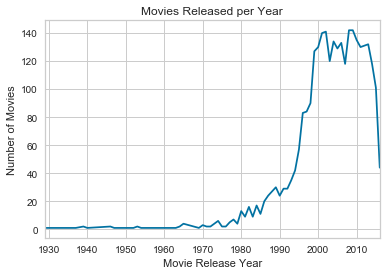

In [238]:
#graph of release years for all movies
dp1.groupby('title_year').size().plot()
plt.xlabel('Movie Release Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released per Year');

In [239]:
#seperate the years 1980 to most recent only in dataset
dp1 = dp1.loc[dp1['title_year'] > 1979]
dp1['title_year'].describe()

count    2896.000000
mean     2003.791091
std         7.810197
min      1980.000000
25%      1999.000000
50%      2005.000000
75%      2010.000000
max      2016.000000
Name: title_year, dtype: float64

A plot of the years movies are relseased shows that most of the movies were released after 1980. We can remove any movies released prior to 1980 from our analysis [6]. 

My data analysis is now focusing on movies released in the USA after 1980. I will export a csv file with the new dataset for refence.

### 3.d Create New Variables
Create a new variable "profit" 

In [240]:
#create variable profit
dp1['profit'] = dp1['gross'] - dp1['budget']
dp1.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   
6      1          Sam Raimi                   392.0     156.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   
6                      0.0                  4000.0      James Franco   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   
6                 24000.0  336530303.0         Action|Adventure|Romance   

   actor_1_name                                movie_title  num_voted_users  \
0   CCH Pounder                                    Avatar            886204   
1   Johnny Depp  Pirates of the Caribbean: At World's End            471220   
3     Tom Hardy                     The Dark Knight Rises           1144337   
5  Daryl Sabara                               John Carter            212204   
6  J.K. Simmons                              Spider-Man 3            383056   

   cast_total_facebook_likes          actor_3_name  facenumber_in_poster  \
0                       4834             Wes Studi                   0.0   
1                      48350        Jack Davenport                   0.0   
3                     106759  Joseph Gordon-Levitt                   0.0   
5                       1873          Polly Walker                   1.0   
6                      46055         Kirsten Dunst                   0.0   

   num_user_for_reviews country content_rating       budget  title_year  \
0                3054.0     USA          PG-13  237000000.0      2009.0   
1                1238.0     USA          PG-13  300000000.0      2007.0   
3                2701.0     USA          PG-13  250000000.0      2012.0   
5                 738.0     USA          PG-13  263700000.0      2012.0   
6                1902.0     USA          PG-13  258000000.0      2007.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
0                   936.0         7.9          1.78                 33000   
1                  5000.0         7.1          2.35                     0   
3                 23000.0         8.5          2.35                164000   
5                   632.0         6.6          2.35                 24000   
6                 11000.0         6.2          2.35                     0   

        profit  
0  523505847.0  
1    9404152.0  
3  198130642.0  
5 -190641321.0  
6   78530303.0

In [241]:
#check dataset
dp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 5042
Data columns (total 26 columns):
color                        2896 non-null int64
director_name                2896 non-null object
num_critic_for_reviews       2896 non-null float64
duration                     2896 non-null float64
director_facebook_likes      2896 non-null float64
actor_3_facebook_likes       2896 non-null float64
actor_2_name                 2896 non-null object
actor_1_facebook_likes       2896 non-null float64
gross                        2896 non-null float64
genres                       2896 non-null object
actor_1_name                 2896 non-null object
movie_title                  2896 non-null object
num_voted_users              2896 non-null int64
cast_total_facebook_likes    2896 non-null int64
actor_3_name                 2896 non-null object
facenumber_in_poster         2896 non-null float64
num_user_for_reviews         2896 non-null float64
country                      2896 non-

In [242]:
#export data
dp1.to_csv("data/dp1_cleaned_movie_metadata.csv", index=False)

In [243]:
#describe a single categorical column for country
dp1['budget'].describe()

count    2.896000e+03
mean     4.157724e+07
std      4.388383e+07
min      2.180000e+02
25%      1.200000e+07
50%      2.700000e+07
75%      5.500000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [244]:
#show the list of the top 20 movies based on profit
b = dp1.groupby('movie_title')['budget'].sum().sort_values().head(5)
b

movie_title
Tarnation                 218.0
My Date with Drew        1100.0
Primer                   7000.0
El Mariachi              7000.0
Paranormal Activity     15000.0
Name: budget, dtype: float64

Looking at the budget with the new dataset I can see that it is at a more reasonable value of max $300,000,000 and mean of $41,577,240 and minimum of $218.00 (which seems low but is confirmed by here (https://en.wikipedia.org/wiki/Tarnation_(2003_film))

## 4. Business Intelligence

Before we dive into a deep look I want to take a look at some of the general information from the data set to see what should be looked into a bit more. I started with a line graph of the IMDB scores. This graph shows that a majority of the movies have a socres close to 7. 

### 4.1 IMDB Scores

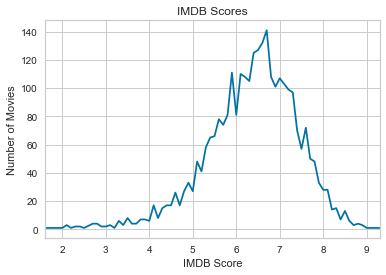

In [245]:
#graph of average IMDB scores for all movies made in USA after 1980
dp1.groupby('imdb_score').size().plot()
plt.xlabel('IMDB Score')
plt.ylabel('Number of Movies')
plt.title('IMDB Scores');

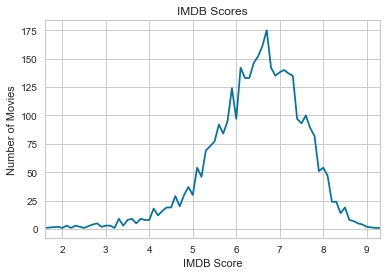

In [246]:
#graph of average IMDB scores for all movies in data set
dp.groupby('imdb_score').size().plot()
plt.xlabel('IMDB Score')
plt.ylabel('Number of Movies')
plt.title('IMDB Scores');

Since I decided to look at moves released in USA after 1980 I wanted to compare the IMDB scores for both the clean data set with no duplicates and the one I plan to do the remained of my analysis on. The comparison shows that the IMDB scores tend to be between 6 and 8 for both. This confirms that focusing my analysis does not alter the affect on IMDB scores. 

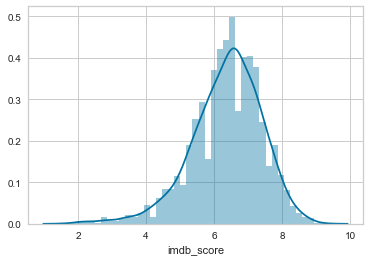

In [247]:
# distpolot of IMDB scores
sns.distplot(dp1.imdb_score);

### 4.2 Genres
Split the different movie genres and compare them to IMDB score to see if this variable has a significant inpact on IMDB score

In [248]:
# split genres
g = dp1[['genres', 'imdb_score']]
g.head()

genres  imdb_score
0  Action|Adventure|Fantasy|Sci-Fi         7.9
1         Action|Adventure|Fantasy         7.1
3                  Action|Thriller         8.5
5          Action|Adventure|Sci-Fi         6.6
6         Action|Adventure|Romance         6.2

In [249]:
#count of genres after split
len(g)

2896

In [250]:
# now, separate a string of genres into multiple rows
# I borrowed the code from our message board

b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

genres  imdb_score
0     Action         7.9
1  Adventure         7.9
2    Fantasy         7.9
3     Sci-Fi         7.9
4     Action         7.1

In [251]:
#count of genres
len(b)

8597

In [252]:
# pivot table for genres showing mean value
b.groupby(['genres']).mean()

imdb_score
genres                 
Action         6.229054
Adventure      6.396147
Animation      6.628571
Biography      7.100000
Comedy         6.123184
Crime          6.468116
Documentary    6.742857
Drama          6.699495
Family         6.163788
Fantasy        6.210361
History        7.137662
Horror         5.857143
Music          6.227119
Musical        6.405970
Mystery        6.400699
Romance        6.311503
Sci-Fi         6.281491
Sport          6.508871
Thriller       6.306147
War            6.978947
Western        6.676190

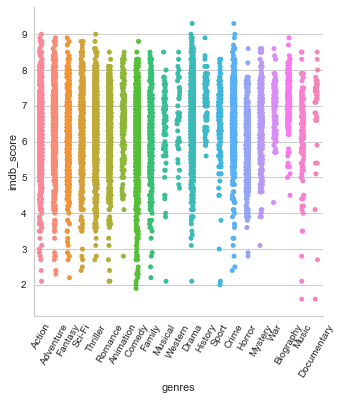

In [253]:
# scatter plot comparing genres in terms of imdb score
sns.catplot("genres", "imdb_score", data=b)
plt.xticks(rotation=60);

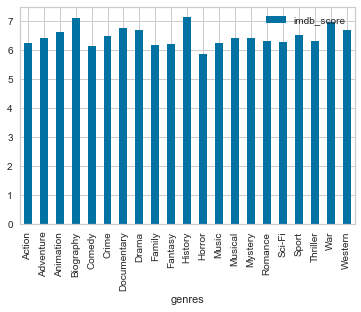

In [254]:
# pivot table for genres showing mean value
b.groupby(['genres']).mean().plot(kind='bar')

(array([  3.,   5.,  19.,  36.,  92., 206., 219., 107.,  40.,  13.]),
 array([2.1 , 2.79, 3.48, 4.17, 4.86, 5.55, 6.24, 6.93, 7.62, 8.31, 9.  ]),
 <a list of 10 Patch objects>)

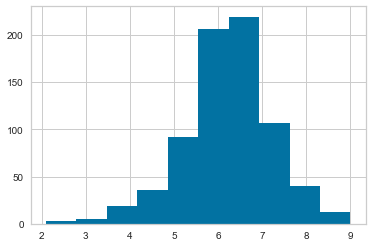

In [255]:
#bar graph of Action genre only
action = b.loc[b['genres'] =='Action']
plt.hist(action['imdb_score'])

(array([  3.,   5.,  19.,  36.,  92., 206., 219., 107.,  40.,  13.]),
 array([2.1 , 2.79, 3.48, 4.17, 4.86, 5.55, 6.24, 6.93, 7.62, 8.31, 9.  ]),
 <a list of 10 Patch objects>)

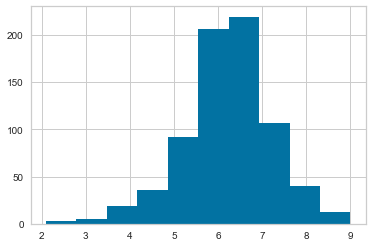

In [256]:
#bar graph of drama genre only
drama = b.loc[b['genres'] =='Drama']
plt.hist(action['imdb_score'])

(array([  3.,   5.,  19.,  36.,  92., 206., 219., 107.,  40.,  13.]),
 array([2.1 , 2.79, 3.48, 4.17, 4.86, 5.55, 6.24, 6.93, 7.62, 8.31, 9.  ]),
 <a list of 10 Patch objects>)

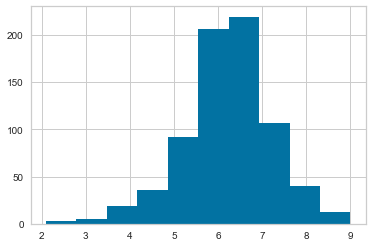

In [257]:
#bar graph of documentry genre only
documentary = b.loc[b['genres'] =='Documentary']
plt.hist(action['imdb_score'])

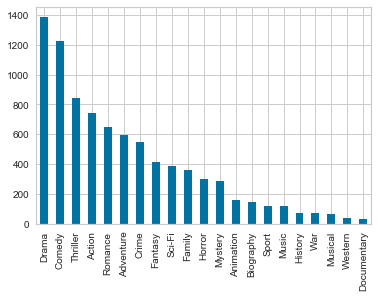

In [258]:
#bar graph of genres as value counts
b['genres'].value_counts().plot(kind='bar')

In [259]:
#import packages
import plotly.graph_objects as go
import plotly.express as px

In [260]:
#interactive graph for genres and imdb score
px.histogram(b, x="genres", y="imdb_score", histfunc='avg')

The average IMDB score based on genre is between 5 and 8 which means there is little difference between the genres and this variable doesn't not have much affect on IMDB score.

### 4.3 Content Rating
I will look at content rating to see if it has a postive correlation to IMDB movie ratings

In [261]:
# split content ratings
c = dp1[['content_rating', 'imdb_score']]
c.head()

content_rating  imdb_score
0          PG-13         7.9
1          PG-13         7.1
3          PG-13         8.5
5          PG-13         6.6
6          PG-13         6.2

In [262]:
#count of content ratings
len(c)

2896

In [263]:
# pivot table for genres showing mean value
c.groupby(['content_rating']).mean()

imdb_score
content_rating            
G                 6.403279
NC-17             6.590909
PG                6.209865
PG-13             6.203336
R                 6.551886

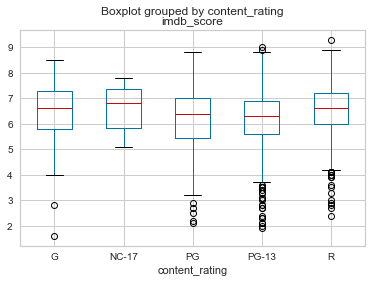

In [264]:
#boxplot for imdbscore and content rating
c.boxplot(column='imdb_score', by='content_rating');

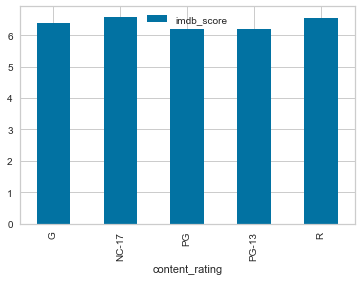

In [265]:
# pivot table for content ratings showing mean value
c.groupby(['content_rating']).mean().plot(kind='bar')

The average IMDB score for content rating is between 6 and 7 so this variable does not have a significant influence on IMDB score. 

### 4.3 Top 20 Movies by Profit

With my cleaned up data I can do a deeper dive into the variables to see what contributes to a high IMDB score for movies released after 1980 in the USA. First lets look at the list of top 20 mivies based on profit

In [266]:
#show the list of the top 20 movies based on profit
t = dp1.groupby('movie_title')['profit'].sum().sort_values(ascending = False).head(20)
t

movie_title
Avatar                                            523505847.0
Jurassic World                                    502177271.0
Titanic                                           458672302.0
E.T. the Extra-Terrestrial                        424449459.0
The Avengers                                      403279547.0
The Lion King                                     377783777.0
Star Wars: Episode I - The Phantom Menace         359544677.0
The Dark Knight                                   348316061.0
The Hunger Games                                  329999255.0
Twilight                                          308898950.0
Deadpool                                          305024263.0
The Hunger Games: Catching Fire                   294645577.0
Jurassic Park                                     293784000.0
Despicable Me 2                                   292049635.0
American Sniper                                   291323553.0
Finding Nemo                                      28683887

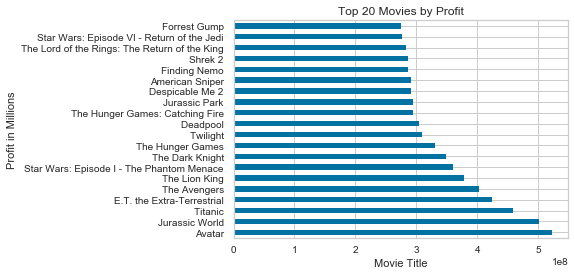

In [267]:
#bar graph
t.plot(kind = 'barh')
plt.xlabel('Movie Title')
plt.ylabel('Profit in Millions')
plt.title('Top 20 Movies by Profit');

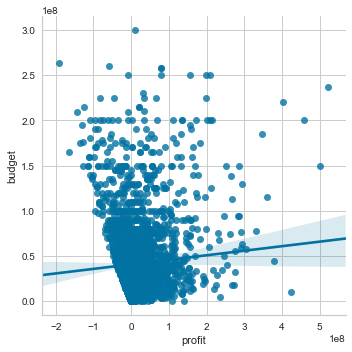

In [268]:
#linear regression and scatter chart for profit and gross
sns.lmplot('profit', 'budget', dp1);

In [269]:
#create and interactive plot based on movie title, budget and profit
px.scatter(dp1, x="budget", y="profit", hover_name='movie_title', trendline='ols')

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [270]:
#create and interactive plot showing the budget compared to IMDB score with movie title and regression line
px.scatter(dp1, x="budget", y="imdb_score", hover_name='movie_title', trendline='ols')

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Looking at profit and budget for movies there is a positive correlation between the amount of money spent on a movie (budget) and the amount of money it makes (profit = gross-budget). 

### 4.5 Top 20 Movies by Director IMDB Score

Now that we know the top 20 movies based on profit, lets see who the top 20 directors based on IMDB score are.

In [271]:
#how many values in 'director_name' column
dp1['director_name'].describe()

count                 2896
unique                1323
top       Steven Spielberg
freq                    21
Name: director_name, dtype: object

In [272]:
#top 20 directors
dn = dp1.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20)
dn

director_name
Irvin Kershner       8.800000
Tony Kaye            8.600000
Ron Fricke           8.500000
Damien Chazelle      8.500000
Christopher Nolan    8.425000
Richard Marquand     8.400000
Lee Unkrich          8.300000
Milos Forman         8.300000
Pete Docter          8.233333
Quentin Tarantino    8.200000
Tim Miller           8.100000
Steve McQueen        8.100000
Stephen Chbosky      8.000000
Frank Darabont       7.975000
Alfonso Cuarón       7.900000
Jonathan Dayton      7.900000
Dan Gilroy           7.900000
Tom McCarthy         7.900000
Philip Kaufman       7.900000
Don Hall             7.900000
Name: imdb_score, dtype: float64

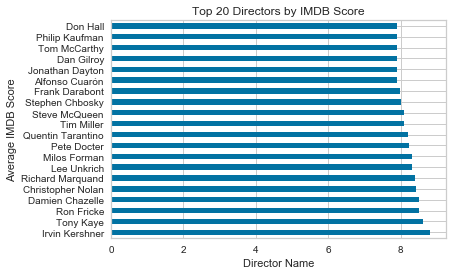

In [273]:
# bar graph
dn.plot(kind = 'barh')
plt.xlabel('Director Name')
plt.ylabel('Average IMDB Score')
plt.title('Top 20 Directors by IMDB Score');

In [274]:
#create and interactive plot based on director name, imdb score, content rating and release year
px.scatter(dp1, x="title_year", y="imdb_score", color='content_rating', hover_name='director_name')

The top 20 directors have an average IMDB score of 7.8-8.6 which is a very hgh ranking. 

### 4.6 Relation between number of facebook likes and imdb_score

In [275]:
#facebook likes and imdb_scores
fb = dp1.groupby('imdb_score')['movie_facebook_likes'].mean().sort_values(ascending = False).head(10)
fb

imdb_score
9.3    108000.000000
8.6     85500.000000
8.8     74750.000000
1.6     62000.000000
8.5     59384.615385
8.1     58535.714286
8.2     45714.285714
9.0     37000.000000
8.0     34142.857143
8.9     34000.000000
Name: movie_facebook_likes, dtype: float64

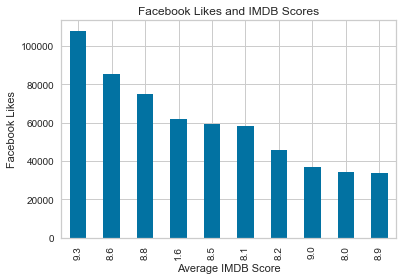

In [276]:
# bar graph
fb.plot(kind='bar')
plt.xlabel('Average IMDB Score')
plt.ylabel('Facebook Likes')
plt.title('Facebook Likes and IMDB Scores');

In [277]:
#create interactive plot for social media likes and imdb score
px.scatter(dp1, x="movie_facebook_likes", y="imdb_score", color='content_rating', hover_name='movie_title')

The number of facebook or social media likes does not seemt to be related to the imdb score of a movie.

### 4.7 Actors and IMDB scores

In [278]:
#how many values in 'actor_1_name' column
dp1['actor_1_name'].describe()

count               2896
unique              1096
top       Robert De Niro
freq                  36
Name: actor_1_name, dtype: object

In [279]:
#top 5 actors 1
a1 = dp1.groupby('actor_1_name')['imdb_score'].mean().sort_values(ascending = False).head(5)
a1

actor_1_name
Collin Alfredo St. Dic    8.5
Mhairi Calvey             8.4
William Gates             8.3
Marshall Bell             8.1
Hanno Pöschl              8.1
Name: imdb_score, dtype: float64

In [280]:
#top 5 actors 1
a1a = dp1.groupby('actor_1_name')['actor_1_facebook_likes'].mean().sort_values(ascending = False).head(5)
a1a

actor_1_name
Darcy Donavan      640000.0
Matthew Ziff       260000.0
Krista Allen       164000.0
Andrew Fiscella    137000.0
Jimmy Bennett       87000.0
Name: actor_1_facebook_likes, dtype: float64

In [281]:
#create interactive plot for social media likes and imdb score
px.scatter(dp1, x="actor_1_facebook_likes", y="imdb_score", hover_name='actor_1_name')

In [282]:
#how many values in 'actor_2_name' column
dp1['actor_2_name'].describe()

count               2896
unique              1706
top       Morgan Freeman
freq                  16
Name: actor_2_name, dtype: object

In [283]:
#top 5 actors 2
a2 = dp1.groupby('actor_2_name')['imdb_score'].mean().sort_values(ascending = False).head(5)
a2

actor_2_name
Billy Boyd          8.9
Jeffrey DeMunn      8.9
Kenny Baker         8.8
Marcus Chong        8.7
Thomas F. Wilson    8.5
Name: imdb_score, dtype: float64

In [284]:
#create interactive plot for social media likes and imdb score
px.scatter(dp1, x="actor_2_facebook_likes", y="imdb_score", hover_name='actor_2_name')

In [285]:
#how many values in 'actor_3_name' column
dp1['actor_3_name'].describe()

count              2896
unique             2042
top       Anne Hathaway
freq                  7
Name: actor_3_name, dtype: object

In [286]:
#top 5 actors 3
a3 = dp1.groupby('actor_3_name')['imdb_score'].mean().sort_values(ascending = False).head(5)
a3

actor_3_name
Caroline Goodall     8.9
Phil LaMarr          8.9
Eugenie Bondurant    8.8
Anthony Daniels      8.8
Sam Anderson         8.8
Name: imdb_score, dtype: float64

In [287]:
#create interactive plot for social media likes and imdb score
px.scatter(dp1, x="actor_3_facebook_likes", y="imdb_score", hover_name='actor_3_name')

Actor facebook likes does not seem to affect IMDB score for any of the actor categories. 

### 5. Correlation Analysis
Having completed some currsory analysis of the data set it is time to look at the Correlation Analysis of the data set. The correlation analysis will only look at the numberical variables in the data set. 

In [288]:
#correlation analysis
dp1.corr()

color  num_critic_for_reviews  duration  \
color                      1.000000                0.008448 -0.050054   
num_critic_for_reviews     0.008448                1.000000  0.280237   
duration                  -0.050054                0.280237  1.000000   
director_facebook_likes   -0.084720                0.186942  0.225819   
actor_3_facebook_likes     0.027299                0.274425  0.142919   
actor_1_facebook_likes     0.016154                0.166857  0.097320   
gross                      0.029991                0.479223  0.278183   
num_voted_users           -0.036199                0.600545  0.372585   
cast_total_facebook_likes  0.021164                0.244575  0.139323   
facenumber_in_poster       0.023090               -0.029458  0.000689   
num_user_for_reviews      -0.065804                0.569909  0.376076   
budget                     0.041980                0.483263  0.322769   
title_year                 0.052963                0.508282 -0.044824   
actor_2_facebook_likes     0.019337                0.272945  0.149612   
imdb_score                -0.080212                0.372119  0.379678   
aspect_ratio               0.023083                0.177466  0.160643   
movie_facebook_likes       0.026076                0.709297  0.259248   
profit                     0.005955                0.245392  0.108607   

                           director_facebook_likes  actor_3_facebook_likes  \
color                                    -0.084720                0.027299   
num_critic_for_reviews                    0.186942                0.274425   
duration                                  0.225819                0.142919   
director_facebook_likes                   1.000000                0.126991   
actor_3_facebook_likes                    0.126991                1.000000   
actor_1_facebook_likes                    0.086927                0.246431   
gross                                     0.138872                0.281604   
num_voted_users                           0.327262                0.269297   
cast_total_facebook_likes                 0.119079                0.476986   
facenumber_in_poster                     -0.050013                0.106102   
num_user_for_reviews                      0.244039                0.212255   
budget                                    0.095448                0.262864   
title_year                               -0.072236                0.136884   
actor_2_facebook_likes                    0.123048                0.546248   
imdb_score                                0.227141                0.091245   
aspect_ratio                              0.047772                0.047853   
movie_facebook_likes                      0.176720                0.293254   
profit                                    0.106835                0.161113   

                           actor_1_facebook_likes     gross  num_voted_users  \
color                                    0.016154  0.029991        -0.036199   
num_critic_for_reviews                   0.166857  0.479223         0.600545   
duration                                 0.097320  0.278183         0.372585   
director_facebook_likes                  0.086927  0.138872         0.327262   
actor_3_facebook_likes                   0.246431  0.281604         0.269297   
actor_1_facebook_likes                   1.000000  0.129566         0.172258   
gross                                    0.129566  1.000000         0.632892   
num_voted_users                          0.172258  0.632892         1.000000   
cast_total_facebook_likes                0.947060  0.215261         0.242142   
facenumber_in_poster                     0.050788 -0.036607        -0.042755   
num_user_for_reviews                     0.119936  0.545043         0.780991   
budget                                   0.147291  0.654410         0.413825   
title_year                               0.080359  0.075358         0.051563   
actor_2_facebook_likes                 

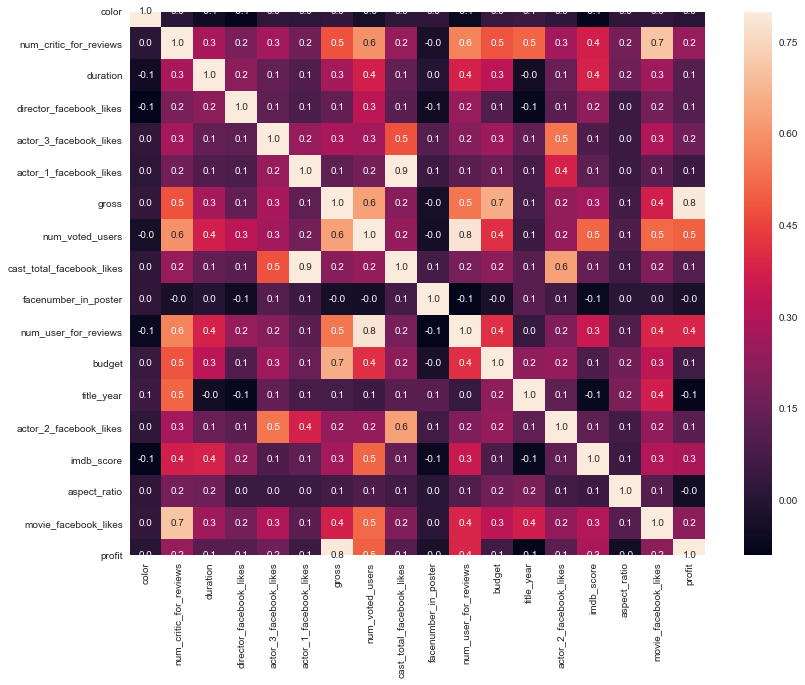

In [289]:
#correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(dp1.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

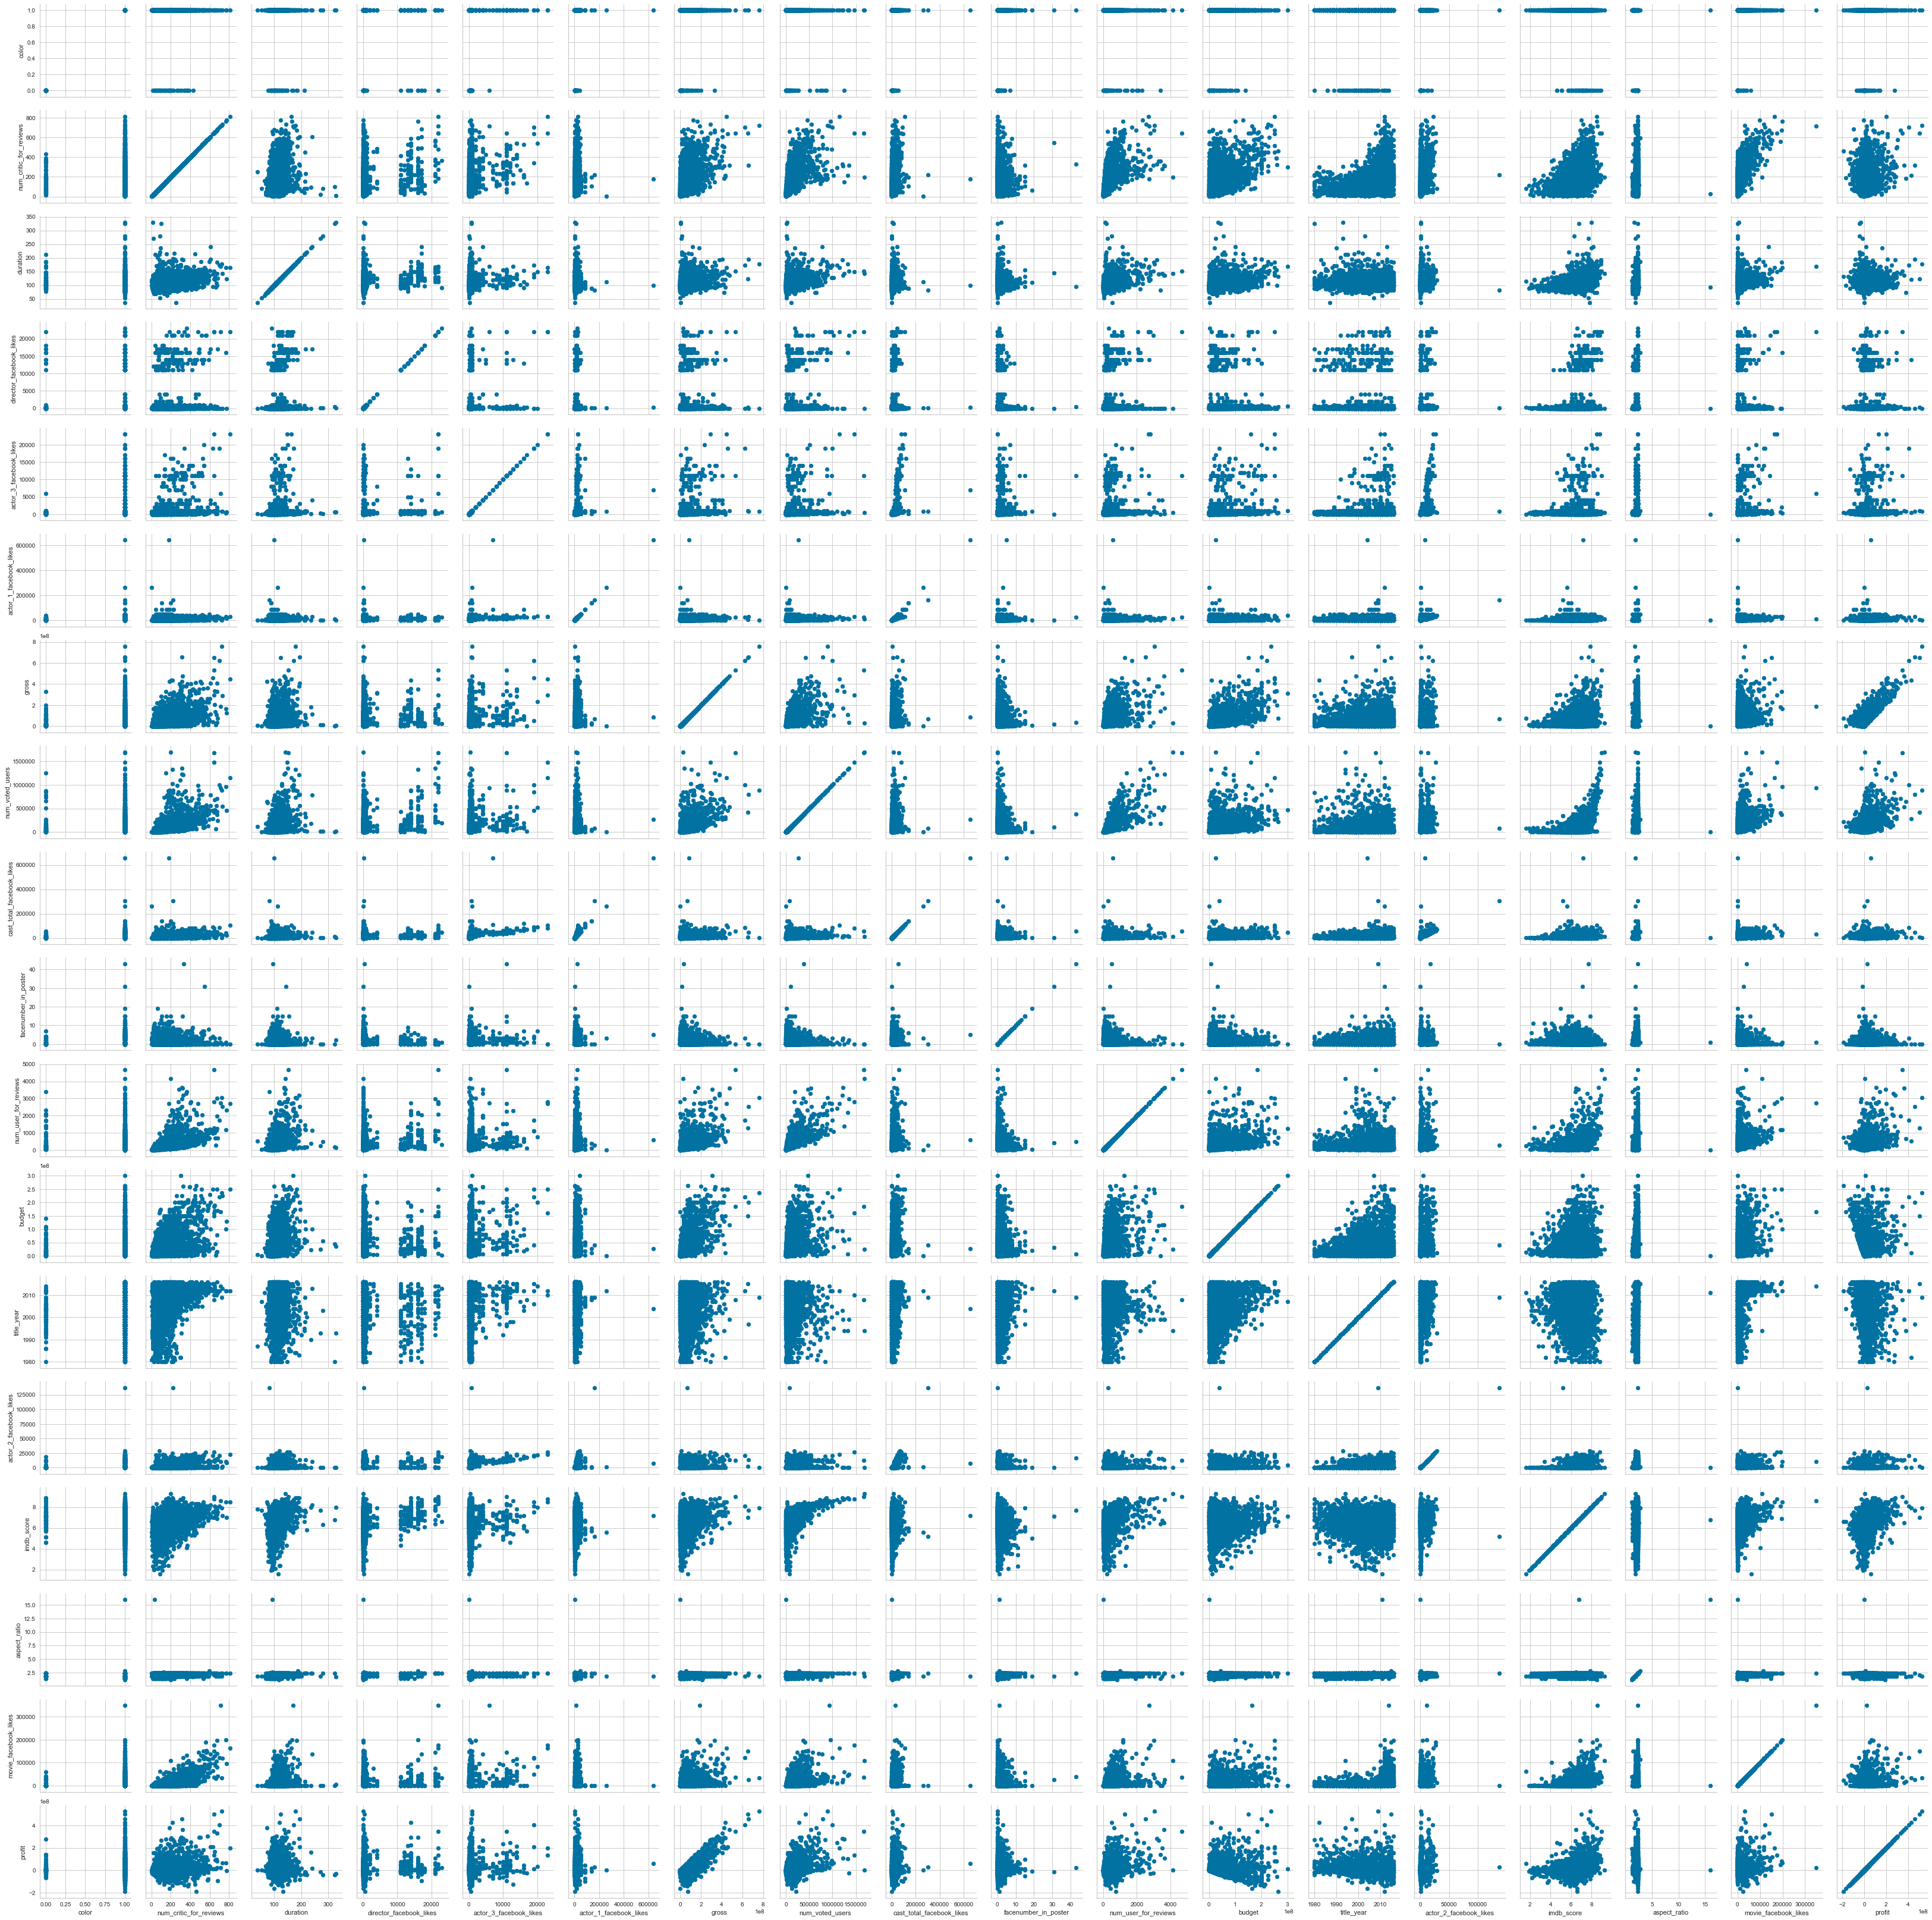

In [290]:
# plot PairGrid

f = sns.PairGrid(dp1)
f.map(plt.scatter)

The correlation analysis shows that there is a positive correlation between IMDB score and:
- num_critic_for_reviews
- duration
- num_voted_users
- num_users_for_review
- movie_facebook_likes
- gross and profit are on the border of being meaningful

The correlation analysis shows that there is a no correlation between IMDB socre and:
- color
- facebook_likes
- actor_3_facebook_likes
- actor_1_facebook_likes
- gross
- cast_total_facebook_likes
- facenumber_in_poster
- title_year
- actor_2_gacebook_likes
- aspect_ratio

### 5.1 Compare number of critics for review and IMDB scores

In [291]:
# find out correlation of two columns: num_critic_for_reviews, imdb_score
dp1[['num_critic_for_reviews','imdb_score']].corr()

num_critic_for_reviews  imdb_score
num_critic_for_reviews                1.000000    0.372119
imdb_score                            0.372119    1.000000

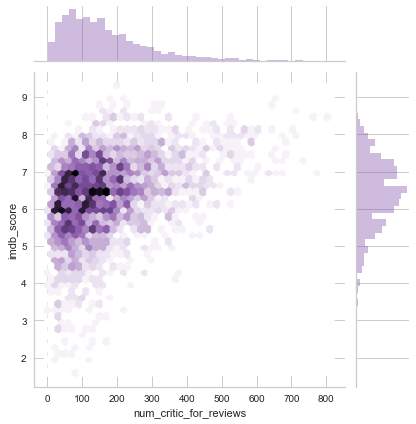

In [292]:
# jointplott for num_critic_for_reviews, imdb_score
sns.jointplot("num_critic_for_reviews", "imdb_score", dp1, kind="hex", color="#8855AA")

### 5.2 Compare Duration and IMDB scores

In [293]:
# find out correlation of two columns: duration and imdb_score
dp1[['duration','imdb_score']].corr()

duration  imdb_score
duration    1.000000    0.379678
imdb_score  0.379678    1.000000

In [294]:
#how many values in 'duration' column
dp1['duration'].describe()

count    2896.000000
mean      109.205456
std        21.216319
min        37.000000
25%        95.000000
50%       105.000000
75%       119.000000
max       330.000000
Name: duration, dtype: float64

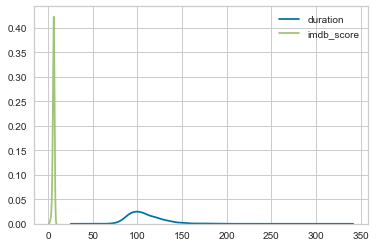

In [295]:
#density kde plot for duration and imdb score
sns.kdeplot(dp1.duration)
sns.kdeplot(dp1.imdb_score)

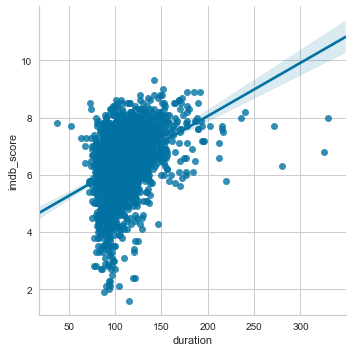

In [296]:
#lineplot for movie facebook likes and imdb score
sns.lmplot(x="duration", y="imdb_score", data=dp1);

In [297]:
#create interactive plot for social media likes and imdb score
px.scatter(dp1, x="duration", y="imdb_score", hover_name='movie_title', trendline='ols')

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



### 5.3 Comapre number voted users and IMDB scores

In [298]:
# find out correlation of two columns: number of voted users and imdb_score
dp1[['num_voted_users','imdb_score']].corr()

num_voted_users  imdb_score
num_voted_users         1.000000    0.514483
imdb_score              0.514483    1.000000

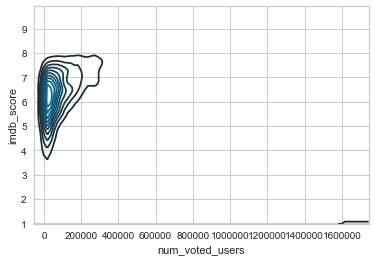

In [299]:
#density kde plot
sns.kdeplot(dp1.num_voted_users, dp1.imdb_score)

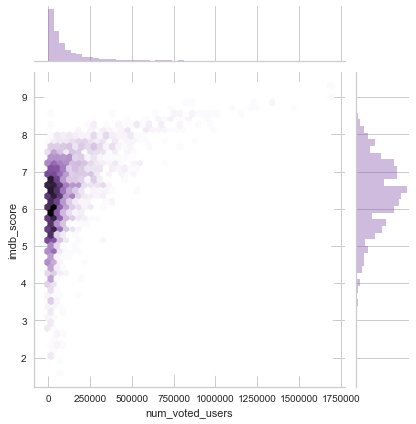

In [300]:
# jointplott for number of voted users, imdb_score
sns.jointplot("num_voted_users", "imdb_score", dp1, kind="hex", color="#8855AA")

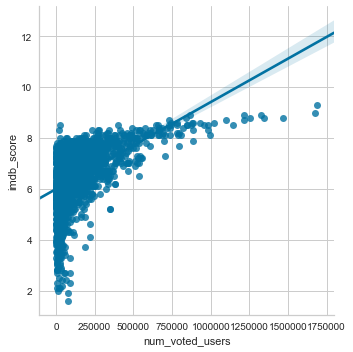

In [301]:
#lineplot for number voted users and imdb score
sns.lmplot(x="num_voted_users", y="imdb_score", data=dp1)

### 5.4 Compare number of users for reviews and IMDB scores

In [302]:
# find out correlation of two columns: number of users for reviews and imdb_score
dp1[['num_user_for_reviews','imdb_score']].corr()

num_user_for_reviews  imdb_score
num_user_for_reviews               1.00000     0.34937
imdb_score                         0.34937     1.00000

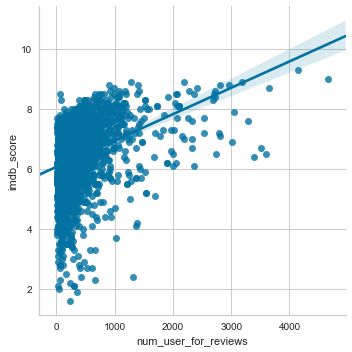

In [303]:
#lineplot for number users for review and imdb score
sns.lmplot(x="num_user_for_reviews", y="imdb_score", data=dp1)

### 5.5 Comapre Movie Facebook Likes and IMDB score

In [304]:
# find out correlation of two columns: movie facebook likes and imdb_score
dp1[['movie_facebook_likes','imdb_score']].corr()

movie_facebook_likes  imdb_score
movie_facebook_likes              1.000000    0.302186
imdb_score                        0.302186    1.000000

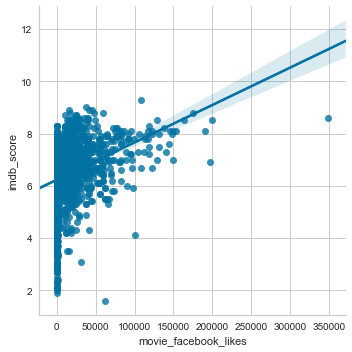

In [305]:
#lineplot for movie facebook likes and imdb score
sns.lmplot(x="movie_facebook_likes", y="imdb_score", data=dp1)

### 5.6 Compare number critics for review and number voted users

In [306]:
# find out correlation of two columns: number of voted users and number of critical reviews
dp1[['num_critic_for_reviews','num_voted_users']].corr()

num_critic_for_reviews  num_voted_users
num_critic_for_reviews                1.000000         0.600545
num_voted_users                       0.600545         1.000000

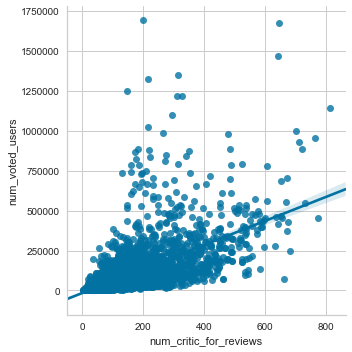

In [307]:
#lineplot for number of critical reviews and number of voted users
sns.lmplot(x="num_critic_for_reviews", y="num_voted_users", data=dp1);

### 6. Storytelling

### Summary of Findings
#### The goals of my analysis were to 1. Describe what impact social media likes have on IMDB scores  [5] 2. Show the affect of movie profit on IMDB score [4] and 3. Investigate movie genres and ratings and the affect on IMDB score [4].
1. For social media likes I analyzed both facebook likes and actor likes on IMDB scores. The analysis for each category doesn't shows that the number of total facebook likes does not have a significant impact on IMDB score. However looking at the correlation analysis of IMDB score and facebook movie likes it shows the correlation is barely significant. Since the significance is so low I would recommend looking at other factors to see if there is a stronger correlation.  
2. Creating the new variable profit helps in the analysis becuase based on research on successful movies profit is an industry standard for measuring success. When looking at how this presumably important variable measures with IMDB socre you can see that there is a slight positive relationship. This matches with the correlation analysis which shows a barely meaningful correlation between the two variables. I would recommend looking for a stronger correlation.
3. Once the movie genres where cleaned so that the categories were the same I could analyze the impact of IMDB score based on genre. This analysis revealed that the genre had little to no impact on IMDB score. Similarly I analyzed rating for movies to see if this variable had an impact, it did not. 

#### Other Insights 
- Looking at title year release date and IMDB scores you can see that there are more movies released at the year 2000 with IMDB scores. While all the IMDB scores are within the same range you can see that more recent movies are more likely to have an IMDB score. This relationship can be due to the rise in technology and online services like IMDB for people to communicate about movies. 
- From the correlation analysis the highest correlation is the number of voted users and IMDB score. This shows that many people who are voting for movies on IMDB are leaving mostly positive or successful reviews of movies. 
- Language, country, color or black and white movies, and plot keywords have no affect on IMDB scores and should not be used to predict movie success.
- The most positive correlation is between number of voted users and number of critical reviews. This makes sense since voted users are the ones who left reviews and they tend to leave positive reviews.
- There is a positive relationship is the relationship between budget and IMDB score. 

#### Overall Recommendations
Looking at all the data IMDB scores may not be the most reliable or useful way to determine if a movie will be successful. Since many people leaving reviews for movies leave successful reviews there may be other ways to better predict movie success. From the data set the most surprising finding is that there is a positive relationship between movie duration and IMDB score. The longer a move the more likely it is to have a high IMDB score. While a majority of movies are about 109 minutes long if a movie last longer it is more likely to recieve a higher score. Looking at facebook to predict movie success might be another good indicator, but there are some concerning outliers in the data set showing that people also like very unsuccessful movies. For the provided data set the most reliable variables for predicting movie success would be number of critical reviews on imdb, duration of movie in minutes, and number of people who voted for the movie.

### 7. Regression

From cleaning the data and analyzing it I wanted to start my regression models with some variables I found most significant including: profit, social media likes, 

For the regression analysis there are a few more variables I want to drop including movie title, country. 

In [308]:
#rename columns for ease in buliding models
newdp = dp1.rename({'content_rating':'CR', 'num_critic_for_reviews': 'NCR', 'director_facebook_likes': 'DFB', 'actor_3_facebook_likes': 'Actor3FB', 'actor_1_facebook_likes': 'Actor1FB', 'num_voted_users': 'VotedUsers', 'cast_total_facebook_likes':'CastTotalFB', 'facenumber_in_poster': 'FacePoster', 'num_user_for_reviews': 'UserReviews', 'actor_2_facebook_likes': 'Actor2FB', 'movie_facebook_likes': 'MovieFB'}, axis=1)
newdp.head()

color      director_name    NCR  duration      DFB  Actor3FB  \
0      1      James Cameron  723.0     178.0      0.0     855.0   
1      1     Gore Verbinski  302.0     169.0    563.0    1000.0   
3      1  Christopher Nolan  813.0     164.0  22000.0   23000.0   
5      1     Andrew Stanton  462.0     132.0    475.0     530.0   
6      1          Sam Raimi  392.0     156.0      0.0    4000.0   

       actor_2_name  Actor1FB        gross                           genres  \
0  Joel David Moore    1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1     Orlando Bloom   40000.0  309404152.0         Action|Adventure|Fantasy   
3    Christian Bale   27000.0  448130642.0                  Action|Thriller   
5   Samantha Morton     640.0   73058679.0          Action|Adventure|Sci-Fi   
6      James Franco   24000.0  336530303.0         Action|Adventure|Romance   

   actor_1_name                                movie_title  VotedUsers  \
0   CCH Pounder                                    Avatar       886204   
1   Johnny Depp  Pirates of the Caribbean: At World's End       471220   
3     Tom Hardy                     The Dark Knight Rises      1144337   
5  Daryl Sabara                               John Carter       212204   
6  J.K. Simmons                              Spider-Man 3       383056   

   CastTotalFB          actor_3_name  FacePoster  UserReviews country     CR  \
0         4834             Wes Studi         0.0       3054.0     USA  PG-13   
1        48350        Jack Davenport         0.0       1238.0     USA  PG-13   
3       106759  Joseph Gordon-Levitt         0.0       2701.0     USA  PG-13   
5         1873          Polly Walker         1.0        738.0     USA  PG-13   
6        46055         Kirsten Dunst         0.0       1902.0     USA  PG-13   

        budget  title_year  Actor2FB  imdb_score  aspect_ratio  MovieFB  \
0  237000000.0      2009.0     936.0         7.9          1.78    33000   
1  300000000.0      2007.0    5000.0         7.1          2.35        0   
3  250000000.0      2012.0   23000.0         8.5          2.35   164000   
5  263700000.0      2012.0     632.0         6.6          2.35    24000   
6  258000000.0      2007.0   11000.0         6.2          2.35        0   

        profit  
0  523505847.0  
1    9404152.0  
3  198130642.0  
5 -190641321.0  
6   78530303.0

In [309]:
#drop movie title, country, genres, names or actors and directors
#none of theses will be needed for further analysis
newdp = newdp.drop(['movie_title', 'country', 'genres','director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name'], axis=1)
newdp.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews     CR       budget  \
0      886204         4834         0.0       3054.0  PG-13  237000000.0   
1      471220        48350         0.0       1238.0  PG-13  300000000.0   
3     1144337       106759         0.0       2701.0  PG-13  250000000.0   
5      212204         1873         1.0        738.0  PG-13  263700000.0   
6      383056        46055         0.0       1902.0  PG-13  258000000.0   

   title_year  Actor2FB  imdb_score  aspect_ratio  MovieFB       profit  
0      2009.0     936.0         7.9          1.78    33000  523505847.0  
1      2007.0    5000.0         7.1          2.35        0    9404152.0  
3      2012.0   23000.0         8.5          2.35   164000  198130642.0  
5      2012.0     632.0         6.6          2.35    24000 -190641321.0  
6      2007.0   11000.0         6.2          2.35        0   78530303.0

In [310]:
#replace G = 0, PG = 1, PG-13 = 2, R = 3, NC-17 = 4
newdp = newdp.replace({'CR': {'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'NC-17': 4}})
newdp.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  imdb_score  aspect_ratio  MovieFB       profit  
0      2009.0     936.0         7.9          1.78    33000  523505847.0  
1      2007.0    5000.0         7.1          2.35        0    9404152.0  
3      2012.0   23000.0         8.5          2.35   164000  198130642.0  
5      2012.0     632.0         6.6          2.35    24000 -190641321.0  
6      2007.0   11000.0         6.2          2.35        0   78530303.0

In [311]:
newdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 5042
Data columns (total 19 columns):
color           2896 non-null int64
NCR             2896 non-null float64
duration        2896 non-null float64
DFB             2896 non-null float64
Actor3FB        2896 non-null float64
Actor1FB        2896 non-null float64
gross           2896 non-null float64
VotedUsers      2896 non-null int64
CastTotalFB     2896 non-null int64
FacePoster      2896 non-null float64
UserReviews     2896 non-null float64
CR              2896 non-null int64
budget          2896 non-null float64
title_year      2896 non-null float64
Actor2FB        2896 non-null float64
imdb_score      2896 non-null float64
aspect_ratio    2896 non-null float64
MovieFB         2896 non-null int64
profit          2896 non-null float64
dtypes: float64(14), int64(5)
memory usage: 452.5 KB


In [312]:
#import regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#lasso regression
from sklearn import linear_model

#model validation
from sklearn.model_selection import train_test_split

### scikit-learn 2 regression model

For my first model I want to look at the variables that I saw as important based on my previous analysis. I will start with voted users and NCR. 

In [313]:
#assigning columns to X and Y variables
y = newdp['imdb_score'] 
X = newdp[['VotedUsers', 'NCR']]

In [314]:
# build a single variable regression model below

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [315]:
# The coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

Coefficients:  [3.02336955e-06 8.21379081e-04]
y-intercept  5.898788373957803
mean square error:  0.7879702340659769
variance or r-squared:  0.27093038037601413


### Evaluation
#### regression Model 1
Doing a scikit-learn regression for number of voted users and number of critical reviews shows that the coeficients are close to zero. The MSE is .788 and the r-squared value is .27. This model seems good. Since I looked at two variables that I found had a very high correlation to IMDB score from my earlier analysis, I want to look at other variables in the data set to see what affect, if any, they have on IMDB score to see if I might have missed any variables that could be important to predicting IMDB score.  

In [316]:
#build a multiple regression model
#assigning columns to X and Y variables
y = newdp['imdb_score'] 
X = newdp.drop(['imdb_score'], axis = 1)

# X contains (too) many independent variables or predictors ... we will see how it goes

In [317]:
#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [318]:
#print original data set numbers
print(len(df), len(X), len(y))

4998 2896 2896


In [319]:
#print train test number count
print(len(X_train), len(y_train), len(X_test), len(y_test))

2027 2027 869 869


In [320]:
X_train.head()

color    NCR  duration    DFB  Actor3FB  Actor1FB       gross  \
788       1  149.0     152.0  488.0     947.0   22000.0  32522352.0   
2678      1  172.0     108.0   79.0     537.0     775.0  24984868.0   
4187      1   26.0      75.0   15.0      36.0    1000.0  32230907.0   
1519      1  107.0     109.0    7.0    1000.0   40000.0  10654581.0   
1001      1   99.0      95.0    0.0     323.0   13000.0  27067160.0   

      VotedUsers  CastTotalFB  FacePoster  UserReviews  CR      budget  \
788       207287        36897         1.0        822.0   3  60000000.0   
2678       50056         3033         2.0        152.0   3  15000000.0   
4187        6062         1385         0.0         30.0   3   2500000.0   
1519       45497        52621         0.0        260.0   3  34000000.0   
1001       18404        14706         1.0        150.0   3  50000000.0   

      title_year  Actor2FB  aspect_ratio  MovieFB      profit  
788       2000.0   11000.0          1.85    15000 -27477648.0  
2678      2014.0     614.0          2.35        0   9984868.0  
4187      2013.0     309.0          1.85        0  29730907.0  
1519      1999.0    9000.0          1.85     1000 -23345419.0  
1001      1999.0     559.0          1.85        0 -22932840.0

In [321]:
y_train.head()

788     7.9
2678    6.3
4187    6.7
1519    5.3
1001    5.9
Name: imdb_score, dtype: float64

In [322]:
X_test.head()

color    NCR  duration     DFB  Actor3FB  Actor1FB        gross  \
165       1  451.0     215.0     0.0     413.0     986.0  107503316.0   
3631      1  147.0      99.0   129.0     362.0     976.0    2077046.0   
2283      1    5.0      93.0    18.0     181.0     400.0   11784000.0   
2223      1  273.0     108.0  1000.0    1000.0   14000.0   34126138.0   
2571      1   15.0     105.0   121.0     384.0   11000.0   13854000.0   

      VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
165       392474         2530         1.0       1229.0   3  130000000.0   
3631       27266         2748         2.0         75.0   3    6000000.0   
2283        6701         1151         0.0         26.0   1   20000000.0   
2223      666937        19364         1.0       1514.0   3   20000000.0   
2571       21079        14677         0.0         55.0   2   20000000.0   

      title_year  Actor2FB  aspect_ratio  MovieFB      profit  
165       2009.0     745.0          2.35    18000 -22496684.0  
3631      2008.0     617.0          2.35        0  -3922954.0  
2283      1994.0     220.0          1.85      444  -8216000.0  
2223      2004.0    4000.0          1.85    52000  14126138.0  
2571      1988.0    3000.0          1.85      818  -6146000.0

In [323]:
X_test.head()

color    NCR  duration     DFB  Actor3FB  Actor1FB        gross  \
165       1  451.0     215.0     0.0     413.0     986.0  107503316.0   
3631      1  147.0      99.0   129.0     362.0     976.0    2077046.0   
2283      1    5.0      93.0    18.0     181.0     400.0   11784000.0   
2223      1  273.0     108.0  1000.0    1000.0   14000.0   34126138.0   
2571      1   15.0     105.0   121.0     384.0   11000.0   13854000.0   

      VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
165       392474         2530         1.0       1229.0   3  130000000.0   
3631       27266         2748         2.0         75.0   3    6000000.0   
2283        6701         1151         0.0         26.0   1   20000000.0   
2223      666937        19364         1.0       1514.0   3   20000000.0   
2571       21079        14677         0.0         55.0   2   20000000.0   

      title_year  Actor2FB  aspect_ratio  MovieFB      profit  
165       2009.0     745.0          2.35    18000 -22496684.0  
3631      2008.0     617.0          2.35        0  -3922954.0  
2283      1994.0     220.0          1.85      444  -8216000.0  
2223      2004.0    4000.0          1.85    52000  14126138.0  
2571      1988.0    3000.0          1.85      818  -6146000.0

In [324]:
y_test.head()

165     7.7
3631    7.0
2283    4.3
2223    8.3
2571    5.2
Name: imdb_score, dtype: float64

In [325]:
#initialize model
model2 = lm.LinearRegression()
#train
model2.fit(X_train, y_train)
#predict 
predicted_y = model2.predict(X_test)

In [326]:
#print coeficients
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_))))

0             1
0          color -3.089803e-01
1            NCR  3.012085e-03
2       duration  1.188595e-02
3            DFB  4.995105e-06
4       Actor3FB  4.871809e-05
5       Actor1FB  5.408779e-05
6          gross -3.227967e-09
7     VotedUsers  3.292537e-06
8    CastTotalFB -5.244547e-05
9     FacePoster -1.838217e-02
10   UserReviews -6.348836e-04
11            CR  1.827896e-02
12        budget -1.413136e-09
13    title_year -2.629849e-02
14      Actor2FB  5.731185e-05
15  aspect_ratio  1.931138e-02
16       MovieFB -7.083146e-07
17        profit  3.774511e-09

In [327]:
#print mse and r-squared
print("mean square error: ", mean_squared_error(y_test, predicted_y))
print("variance or r-squared: ", explained_variance_score(y_test, predicted_y))

mean square error:  0.6421280761095319
variance or r-squared:  0.423865704718952


### Evaluation
#### Regression Train Model 2 
- Looking at the coefficents the number of critical reviews (NCR), color, duration, number of faces in poster (FacePoster), content rating (CR), title year, and aspect ratio might be varibles looking into a bit further. I will review these variables along with the others in futher analysis. 
- The MSE is .64 which is good and the r-squared value is .42 which is pretty high so this is looking pretty good so far, better than the last model. 

### Lasso Regression Model

In [328]:
#lasso regression model variables
y = newdp['imdb_score'] 
X = newdp.drop(['imdb_score'], axis = 1)

In [329]:
#lasso regression model

model3 = linear_model.Lasso(alpha=1)             
model3.fit(X, y)
model3_y = model3.predict(X)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008.7748972014975, tolerance: 0.31299641850828724



In [330]:
print('Coefficients: ', model3.coef_)
print("y-intercept ", model3.intercept_)

Coefficients:  [-0.00000000e+00  1.74832489e-03  1.05588275e-02  1.03414618e-05
  3.53628311e-05  5.00010918e-05 -7.51362554e-10  3.56931190e-06
 -4.76459496e-05 -0.00000000e+00 -4.55406905e-04  0.00000000e+00
 -4.10078524e-09 -0.00000000e+00  5.30693749e-05 -0.00000000e+00
 -2.29150323e-06  1.54553822e-09]
y-intercept  4.917174939355279


In [331]:
coef = ["%.5f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('color', '-0.00000'),
 ('NCR', '0.00175'),
 ('duration', '0.01056'),
 ('DFB', '0.00001'),
 ('Actor3FB', '0.00004'),
 ('Actor1FB', '0.00005'),
 ('gross', '-0.00000'),
 ('VotedUsers', '0.00000'),
 ('CastTotalFB', '-0.00005'),
 ('FacePoster', '-0.00000'),
 ('UserReviews', '-0.00046'),
 ('CR', '0.00000'),
 ('budget', '-0.00000'),
 ('title_year', '-0.00000'),
 ('Actor2FB', '0.00005'),
 ('aspect_ratio', '-0.00000'),
 ('MovieFB', '-0.00000'),
 ('profit', '0.00000')]

In [332]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.6753002281261882
variance or r-squared:  0.37517832632910464


#### Evaluation
##### Lasso Regression Model 3
- This model is less accurate than previous ones I have deployed with MSE of .675 and a r-square value of .3. 
- This model still might not be the best since we have a large number of variables we are analyzing. The large number of variables could be the reason why the r-squared value is fairly low. 

In [333]:
# Choose a smaller set of multiple variables as X and develop a multiple linear regression model (model4).

y = newdp['imdb_score'] 
X = newdp[['gross', 'budget', 'profit']]
model4 = lm.LinearRegression()
model4.fit(X, y)   
model4_y = model4.predict(X)
print('Coefficients: ', model4.coef_)
print("y-intercept ", model4.intercept_)

Coefficients:  [ 2.32910346e-09 -6.13793364e-10  2.94289682e-09]
y-intercept  6.207468700731893


In [334]:
coef = ["%.10f" % i for i in model4.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('gross', '0.0000000023'),
 ('budget', '-0.0000000006'),
 ('profit', '0.0000000029')]

In [335]:
print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  0.9890240956184367
variance or r-squared:  0.0849052540084716


In [336]:
#Lasso regression for gross, profit and budget. 
y = newdp['imdb_score'] 
X = newdp[['gross', 'budget', 'profit']]
model8 = linear_model.Lasso(alpha=1) 
model8.fit(X, y)   
model8_y = model8.predict(X)
print('Coefficients: ', model8.coef_)
print("y-intercept ", model8.intercept_)
print("______________________________________________")
print("mean square error: ", mean_squared_error(y, model8_y))
print("variance or r-squared: ", explained_variance_score(y, model8_y))

Coefficients:  [ 3.81723427e-09 -2.10192361e-09  1.45476565e-09]
y-intercept  6.20746868332522
______________________________________________
mean square error:  0.9890240956184376
variance or r-squared:  0.08490525400847082


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1892321632017229, tolerance: 0.31299641850828724



#### Evaluation
##### Linear Regression Model 4
- This model is very poor with .99 MSE and low r-squared value. These variables, gross, profit and budget might have a significant impact on imdb score. This model might also be too simple with so few variables being analyzed, which could account for the high MSE and low r-squared values. 
- the coeficients are extremely low so this might not be the best model for predicting IMDB score. 
- I also want to look at social media and it's affect but will do a lasso regression to see if it has an impact. 

##### Lasso Model 8
- by running a lasso model and standardizing the variables you can see that there is no difference in MSE and r-squared values.
- the coefficient values are a bit higher with the lasso regression model but it is not significant for gross, budget and profit. 

In [337]:
#Lasso regression for social media likes. 

y = newdp['imdb_score'] 
X = newdp[['Actor1FB', 'Actor2FB', 'Actor3FB', 'CastTotalFB', 'MovieFB']]
model5 = linear_model.Lasso(alpha=1) 
model5.fit(X, y)   
model5_y = model5.predict(X)
print('Coefficients: ', model5.coef_)
print("y-intercept ", model5.intercept_)
print("______________________________________________")
print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

Coefficients:  [ 4.68047338e-05  5.45781771e-05  3.82769049e-05 -4.18929979e-05
  1.39803777e-05]
y-intercept  6.212717306546346
______________________________________________
mean square error:  0.9890240956184367
variance or r-squared:  0.0849052540084716


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.6773339781637, tolerance: 0.31299641850828724



### Evaluation
#### Model 5
- The MSE value is .99 and the r-squared value is .08 meaing this model is not very accurate. This could again be due to the low number of variables used in predicting IMDB score. 
- The coefficients are not as low as other models but still pretty low, social media likes may have not have an impact on IMDB scores. 

In [338]:
#Lasso for other variables not yet analyzed above
y = newdp['imdb_score'] 
X = newdp[['NCR', 'color', 'duration', 'FacePoster', 'CR', 'title_year', 'aspect_ratio']]
model9 = linear_model.Lasso(alpha=1) 
model9.fit(X, y)   
model9_y = model9.predict(X)
print('Coefficients: ', model9.coef_)
print("y-intercept ", model9.intercept_)
print("______________________________________________")
print("mean square error: ", mean_squared_error(y, model9_y))
print("variance or r-squared: ", explained_variance_score(y, model9_y))

Coefficients:  [ 0.00302304 -0.          0.01112174 -0.          0.         -0.0164213
 -0.        ]
y-intercept  37.55179435234646
______________________________________________
mean square error:  0.8013088923442034
variance or r-squared:  0.2585887840862402


### Evaluation
#### Model 9
- The coefficients are very low for these variables and the MSE is .80, very high with a r-squared value pretty low around .25. 
- while this model is a bit better than others, it is still not the best. 

In [339]:
y = newdp['imdb_score'] 
X = newdp[['VotedUsers', 'NCR']]
model10 = linear_model.Lasso(alpha=1) 
model10.fit(X, y)   
model10_y = model10.predict(X)
print('Coefficients: ', model10.coef_)
print("y-intercept ", model10.intercept_)
print("______________________________________________")
print("mean square error: ", mean_squared_error(y, model10_y))
print("variance or r-squared: ", explained_variance_score(y, model10_y))

Coefficients:  [3.07134849e-06 7.21318244e-04]
y-intercept  5.910255822520211
______________________________________________
mean square error:  0.7880702737653944
variance or r-squared:  0.27083781862374434


### Evaluation
#### Model 10
- This model seems to be ok with a MSE of .788 and a r-squared value of .27. 

### Overall Regression Evaluation
- Looking at the regression models I used the best one seems to be the lasso regression model for all variables. It has the highest r-squared value and highest MSE. The variables that are most likely to impact IMDB score from this model are duration, NCR and CR. 

#### Stats Model

In [340]:
#run stats model for all variables except imdb score
runs_reg_model1 = ols("imdb_score~+color+NCR+duration+DFB+Actor3FB+Actor1FB+gross+VotedUsers+CastTotalFB+FacePoster+UserReviews+CR+budget+title_year+Actor2FB+aspect_ratio+MovieFB+profit",newdp)
runs_reg1 = runs_reg_model1.fit()

#run stats model for profit
runs_reg_model2 = ols("imdb_score~profit",newdp)
runs_reg2 = runs_reg_model2.fit()

#run stats model for all social media likes
runs_reg_model3 = ols("imdb_score~DFB+Actor3FB+Actor1FB+CastTotalFB+Actor2FB+MovieFB",newdp)
runs_reg3 = runs_reg_model3.fit()

#run stats model for profit, gross, and budget
runs_reg_model4 = ols("imdb_score~profit+gross+budget",newdp)
runs_reg4 = runs_reg_model4.fit()

#run stats model for all other variables
runs_reg_model5 = ols("imdb_score~NCR+color+duration+FacePoster+CR+title_year+aspect_ratio",newdp)
runs_reg5 = runs_reg_model5.fit()

print(runs_reg1.summary())
print(runs_reg2.summary())
print(runs_reg3.summary())
print(runs_reg4.summary())
print(runs_reg5.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          7.60e-308
Time:                        12:51:50   Log-Likelihood:                -3471.7
No. Observations:                2896   AIC:                             6979.
Df Residuals:                    2878   BIC:                             7087.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       54.3120      5.087     10.677   

In [341]:
print(runs_reg1.mse_resid)
print(runs_reg2.mse_resid)
print(runs_reg3.mse_resid)
print(runs_reg4.mse_resid)
print(runs_reg5.mse_resid)

0.6478679477430656
0.9953535242751587
0.9388261486829859
0.9900496995890055
0.7720990884703


In [342]:
# high values indicate multicollinearity
print(np.linalg.cond(runs_reg1.model.exog))
print(np.linalg.cond(runs_reg2.model.exog))
print(np.linalg.cond(runs_reg3.model.exog))
print(np.linalg.cond(runs_reg4.model.exog))
print(np.linalg.cond(runs_reg5.model.exog))

3076021437005405.5
59809218.00942789
43360.414458127074
5324837582275500.0
632409.1419840443


#### Evaluation

##### Model 1
- The Stats model results show that the r-squared value for all variables except imdb score is very high and the p-value is close to zero for most categories except Director Facebook Likes, Critic Reviews and aspect ratio. The MSE is .648. Overall this model is looking very good. 

##### Model 2
- The MSE is .995 and the r-squared value is very low .08. the P-value is close to zero for all variables. This model doesn't seem to be very good for predicting IMDB ratings. 

##### Model 3
- The r-squared value is kind of low, .133 and the MSE is pretty high, .939. The p-value is zero for all variables except A3FB. 

##### Model 4
- Profit, gross, and budget seem to be no better than just profit alone at predicting IMDB values. the MSE is .99 which is high but the r-squared value is .085. the p-value is zero for all. 

##### Model 5
- Looking at all other variables not already evaluated the r-squared value is .288, have the value of all variables but still higher than when we remove some of the others. The coeffiencts are close to zero for all categories except for duration which could indicate this is an important variable in IMDB scoring. 

### Overall Evaluation
- Multicollinearity is very high for all evaluations. The best model for looking at IMDB scores is model 1, but since that has too many variables model 5 and the variables NCR, color, duration, FacePoster, CR, title_year, and aspect_ratio will be the best variables to look at for IMDB rating. 

#### Feature Selection

In [343]:
#Feature Selection 
y = newdp['imdb_score'] 
X = newdp.drop(['imdb_score'], axis = 1)

In [344]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.780000e+02, 8.862040e+05],
       [1.690000e+02, 4.712200e+05],
       [1.640000e+02, 1.144337e+06],
       ...,
       [7.700000e+01, 7.263900e+04],
       [8.100000e+01, 5.205500e+04],
       [9.000000e+01, 4.285000e+03]])

In [345]:
# this helps us find out which variables are selected

selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[2 7]


In [346]:
# index 2 and 7 refer to duration and Voted Users respectively
X.head(2)

color    NCR  duration    DFB  Actor3FB  Actor1FB        gross  VotedUsers  \
0      1  723.0     178.0    0.0     855.0    1000.0  760505847.0      886204   
1      1  302.0     169.0  563.0    1000.0   40000.0  309404152.0      471220   

   CastTotalFB  FacePoster  UserReviews  CR       budget  title_year  \
0         4834         0.0       3054.0   2  237000000.0      2009.0   
1        48350         0.0       1238.0   2  300000000.0      2007.0   

   Actor2FB  aspect_ratio  MovieFB       profit  
0     936.0          1.78    33000  523505847.0  
1    5000.0          2.35        0    9404152.0

In [347]:
model6 = lm.LinearRegression()
model6.fit(X_new, y)
model6_y = model6.predict(X_new)

print("mean square error: ", mean_squared_error(y, model6_y))
print("variance or r-squared: ", explained_variance_score(y, model6_y))

mean square error:  0.7503593357235018
variance or r-squared:  0.3057298717308726


In [348]:
# this helps us find out which variables are selected

selector = SelectKBest(f_regression, k=4).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 1  2  7 10]


In [349]:
# index 1, 2, and 7 refer to NCR, duration, Voted Users, and User Reviews respectively
X.head(2)

color    NCR  duration    DFB  Actor3FB  Actor1FB        gross  VotedUsers  \
0      1  723.0     178.0    0.0     855.0    1000.0  760505847.0      886204   
1      1  302.0     169.0  563.0    1000.0   40000.0  309404152.0      471220   

   CastTotalFB  FacePoster  UserReviews  CR       budget  title_year  \
0         4834         0.0       3054.0   2  237000000.0      2009.0   
1        48350         0.0       1238.0   2  300000000.0      2007.0   

   Actor2FB  aspect_ratio  MovieFB       profit  
0     936.0          1.78    33000  523505847.0  
1    5000.0          2.35        0    9404152.0

In [350]:
model7 = lm.LinearRegression()
model7.fit(X_new, y)
model7_y = model7.predict(X_new)

print("mean square error: ", mean_squared_error(y, model7_y))
print("variance or r-squared: ", explained_variance_score(y, model7_y))

mean square error:  0.7503593357235018
variance or r-squared:  0.3057298717308726


### Evaluation
#### Feature Selection Model 6
- Feature selection for 2 values chose duation and Voted Users for evaluation. The MSE is .75 and r-squared value is .306. 

#### Feature Selection Model 7
- Feature selection for 4 values choose NCR, duration, Voted users, and User Review for evaluation. the MSE is .25 and the r-squared value is .25. 

#### Overall Evaluation
- Looking at the models duration and voted users seem to be important to determine IMDB scores. When NCR and User Review are added the model the re-squared value is lower becuase there are more variables which makes the number move farther away from the ols. Model 6 is the best Feature selection model. 

### Random Forester

In [351]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = newdp['imdb_score'] 
X = newdp.drop(['imdb_score'], axis =1)

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.0674752807320443
variance or r-squared:  0.9376521141111542


In [352]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.00049220843136364, 'color'),
 (0.006043638880307772, 'aspect_ratio'),
 (0.017480098040900494, 'FacePoster'),
 (0.019897848720996102, 'CR'),
 (0.021763082251380437, 'CastTotalFB'),
 (0.022005878078299988, 'Actor2FB'),
 (0.022225528166086646, 'Actor1FB'),
 (0.0286649072594029, 'Actor3FB'),
 (0.03030213109465622, 'MovieFB'),
 (0.033685963658991826, 'DFB'),
 (0.035394674908501705, 'title_year'),
 (0.035648382846395425, 'NCR'),
 (0.040935520236000396, 'profit'),
 (0.04925645456175587, 'gross'),
 (0.07012401396826132, 'UserReviews'),
 (0.10089866811837589, 'budget'),
 (0.11082968811502757, 'duration'),
 (0.35435131266329595, 'VotedUsers')]

In [353]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

importance
VotedUsers      0.354351
duration        0.110830
budget          0.100899
UserReviews     0.070124
gross           0.049256
profit          0.040936
NCR             0.035648
title_year      0.035395
DFB             0.033686
MovieFB         0.030302
Actor3FB        0.028665
Actor1FB        0.022226
Actor2FB        0.022006
CastTotalFB     0.021763
CR              0.019898
FacePoster      0.017480
aspect_ratio    0.006044
color           0.000492

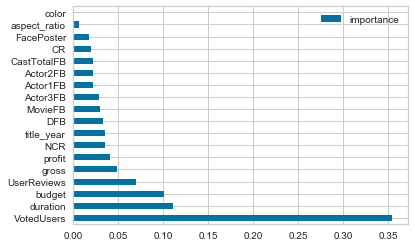

In [354]:
feature_importances.plot(kind='barh')

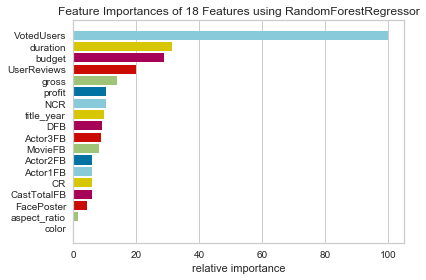

In [355]:
# https://www.scikit-yb.org/en/latest/api/features/importances.html
#from yellowbrick.features.importances import FeatureImportances
from yellowbrick.model_selection import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(RandomForestRegressor(n_estimators=100), ax=ax)
viz.fit(X, y)
viz.poof()

### Evaluation
#### Random Forester
- Random forester has a MSE of .067 which is pretty low but a very high r-squared value of .938. 
- The top 3 variables from this model are Voted Users, duration and budget. 

### Overall Classification Evaluation
- The Random Forester is the best model for evaluation. The variables that are determined to be the best for determinind IMDB score are Voted Users, Duration and Budget. 

#### Extra Credit - webscrapping and regression models

### Classification

In [356]:
#import Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

!pip install pydotplus

### Decision Tree Model

In [357]:
# create a copy of existing column
newdp['imdb_category'] = newdp['imdb_score']
newdp.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  imdb_score  aspect_ratio  MovieFB       profit  \
0      2009.0     936.0         7.9          1.78    33000  523505847.0   
1      2007.0    5000.0         7.1          2.35        0    9404152.0   
3      2012.0   23000.0         8.5          2.35   164000  198130642.0   
5      2012.0     632.0         6.6          2.35    24000 -190641321.0   
6      2007.0   11000.0         6.2          2.35        0   78530303.0   

   imdb_category  
0            7.9  
1            7.1  
3            8.5  
5            6.6  
6            6.2

In [358]:
#create new bins for IMDB score category
#https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe
#0=bad; 1=OK; 2=good; 3=excellent
bins = [0, 4, 6, 8, np.inf]
names = ['bad', 'OK', 'good', 'excellent']

newdp['imdb_category'] = pd.cut(newdp['imdb_score'], bins, labels=[0,1,2,3])
newdp.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  imdb_score  aspect_ratio  MovieFB       profit  \
0      2009.0     936.0         7.9          1.78    33000  523505847.0   
1      2007.0    5000.0         7.1          2.35        0    9404152.0   
3      2012.0   23000.0         8.5          2.35   164000  198130642.0   
5      2012.0     632.0         6.6          2.35    24000 -190641321.0   
6      2007.0   11000.0         6.2          2.35        0   78530303.0   

  imdb_category  
0             2  
1             2  
3             3  
5             2  
6             2

In [359]:
#check the size of each category
newdp.groupby('imdb_category').size()

imdb_category
0      73
1     907
2    1821
3      95
dtype: int64

In [360]:
# declare X variables and y variable

y = newdp['imdb_category']
X = newdp.drop(['imdb_category', 'imdb_score'], axis = 1)
print(y.shape, X.shape)

(2896,) (2896, 18)


In [361]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()
# Train a decision tree model
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [362]:
#Model evaluation for good score
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6892980437284235
--------------------------------------------------------
[[  3  16   2   0]
 [ 10 154 118   0]
 [  6 109 416   6]
 [  0   0   3  26]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.16      0.14      0.15        21
           1       0.55      0.55      0.55       282
           2       0.77      0.77      0.77       537
           3       0.81      0.90      0.85        29

    accuracy                           0.69       869
   macro avg       0.57      0.59      0.58       869
weighted avg       0.69      0.69      0.69       869



In [363]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

True

In [364]:
from IPython.display import IFrame
IFrame('data/dt.pdf', width=1000, height=1000)

This decision tree is very complicated so I am going to simplify it. 

In [365]:
#simplified decision tree model
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
# Train a decision tree model
dt_simple = dt_simple.fit(X_train, y_train)
dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [366]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test))) do not include in multi

0.7054085155350979
--------------------------------------------------------
[[  0  14   7   0]
 [  0 103 179   0]
 [  0  49 485   3]
 [  0   0   4  25]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.62      0.37      0.46       282
           2       0.72      0.90      0.80       537
           3       0.89      0.86      0.88        29

    accuracy                           0.71       869
   macro avg       0.56      0.53      0.53       869
weighted avg       0.68      0.71      0.67       869

--------------------------------------------------------


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [367]:
!pip install graphviz

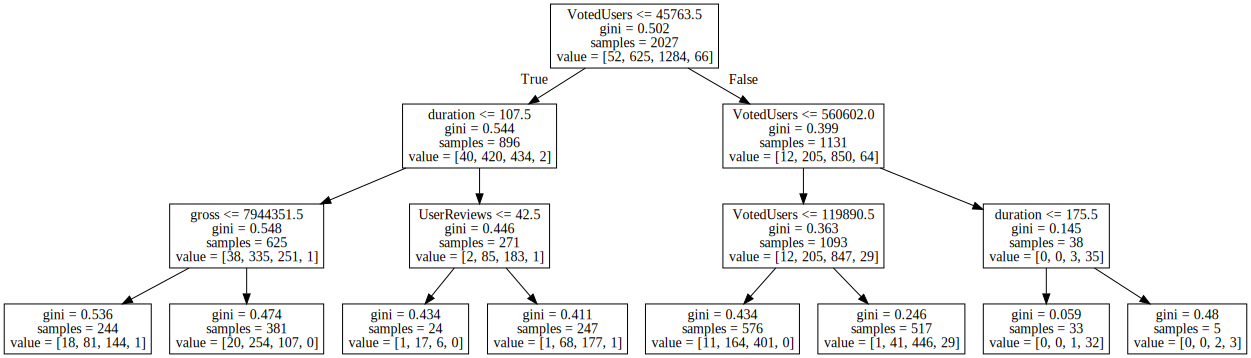

In [368]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X.columns))

### Evaluation
#### Decision Tree
- The decision tree model is 72% accurate for prediciting if a movie will get a "good" imdb rating. The number 1 factor for predicting a good rating is number of voted users. 
- If voted users are less than 45763 is false, and voted users is less than 560602 is false and the budget is less than 165000000 then 32 movies are rated as excellent with a very pure gini
- If voted users are less than 45763 is fall, and voted users is less than 560602 is true and voted users is less than 119890 is false then 446 movies are voted good
-	With the decision tree model in the simple model most of the gini’s are .45 or higher so it is not very pure. The larger model is too complex to make any strong predictions. 

### Random Forest

In [369]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7537399309551208

In [370]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7537399309551208
[[  0  17   4   0]
 [  0 152 130   0]
 [  0  55 478   4]
 [  0   0   4  25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.68      0.54      0.60       282
           2       0.78      0.89      0.83       537
           3       0.86      0.86      0.86        29

    accuracy                           0.75       869
   macro avg       0.58      0.57      0.57       869
weighted avg       0.73      0.75      0.74       869



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [371]:
#Feature selection
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).head(15)

importance
VotedUsers     0.141327
duration       0.099248
gross          0.076979
UserReviews    0.074398
profit         0.071734
DFB            0.071258
NCR            0.069718
budget         0.067701
CastTotalFB    0.051268
Actor3FB       0.047056
Actor1FB       0.044180
MovieFB        0.044112
title_year     0.043954
Actor2FB       0.042565
FacePoster     0.022756

### Evaluation
#### Random Forest Classifier
- Random Forest has a 77% accuracy rate and shows. 
- The top three variables for predicting IMDB score are Voted Users, duration, and user reviews. 
- This is a very good classification. 

### KNN

In [372]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [373]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.5581127733026467
--------------------------------------------------------
[[  0   6  15   0]
 [  6  84 192   0]
 [  4 129 399   5]
 [  0   1  26   2]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.38      0.30      0.33       282
           2       0.63      0.74      0.68       537
           3       0.29      0.07      0.11        29

    accuracy                           0.56       869
   macro avg       0.32      0.28      0.28       869
weighted avg       0.52      0.56      0.53       869



In [374]:
# evaluate the knn model using 10-fold cross-validation

scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.50684932 0.37457045 0.45360825 0.47586207 0.54482759 0.5017301
 0.42560554 0.42708333 0.49305556 0.63888889]
0.48420810823151683


### Evaluation
#### KNN
- KNN shows a 56% accuracy rate. the silhouette score is .2, which is ok but it could indicate some overlapping clusters since the score is so close to zero. 

### Overall Classification Evaluation 
- Overall Random Forest is the best classification. 

### Clustering

#### K-Means Algorithm

To do make data set smaller more manageable. Use the elbow method to find the best number of variables to use in analysis. 

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [376]:
newdp.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  imdb_score  aspect_ratio  MovieFB       profit  \
0      2009.0     936.0         7.9          1.78    33000  523505847.0   
1      2007.0    5000.0         7.1          2.35        0    9404152.0   
3      2012.0   23000.0         8.5          2.35   164000  198130642.0   
5      2012.0     632.0         6.6          2.35    24000 -190641321.0   
6      2007.0   11000.0         6.2          2.35        0   78530303.0   

  imdb_category  
0             2  
1             2  
3             3  
5             2  
6             2

In [377]:
newdp['imdb_category'] = newdp['imdb_category'].astype(int)

In [378]:
cdp = newdp.drop(['imdb_score'], axis=1)
cdp.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  aspect_ratio  MovieFB       profit  imdb_category  
0      2009.0     936.0          1.78    33000  523505847.0              2  
1      2007.0    5000.0          2.35        0    9404152.0              2  
3      2012.0   23000.0          2.35   164000  198130642.0              3  
5      2012.0     632.0          2.35    24000 -190641321.0              2  
6      2007.0   11000.0          2.35        0   78530303.0              2

In [379]:
cdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 5042
Data columns (total 19 columns):
color            2896 non-null int64
NCR              2896 non-null float64
duration         2896 non-null float64
DFB              2896 non-null float64
Actor3FB         2896 non-null float64
Actor1FB         2896 non-null float64
gross            2896 non-null float64
VotedUsers       2896 non-null int64
CastTotalFB      2896 non-null int64
FacePoster       2896 non-null float64
UserReviews      2896 non-null float64
CR               2896 non-null int64
budget           2896 non-null float64
title_year       2896 non-null float64
Actor2FB         2896 non-null float64
aspect_ratio     2896 non-null float64
MovieFB          2896 non-null int64
profit           2896 non-null float64
imdb_category    2896 non-null int64
dtypes: float64(13), int64(6)
memory usage: 452.5 KB


In [380]:
cdp_norm = (cdp - cdp.mean()) / (cdp.max() - cdp.min())
cdp_norm.head()

color       NCR  duration       DFB  Actor3FB  Actor1FB     gross  \
0  0.025207  0.685566  0.234794 -0.040162  0.000287 -0.011622  0.923486   
1  0.025207  0.166454  0.204077 -0.015684  0.006592  0.049315  0.330326   
3  0.025207  0.796540  0.187012  0.916360  0.963113  0.029003  0.512739   
5  0.025207  0.363741  0.077797 -0.019510 -0.013843 -0.012185  0.019551   
6  0.025207  0.277428  0.159708 -0.040162  0.137026  0.024315  0.365994   

   VotedUsers  CastTotalFB  FacePoster  UserReviews        CR    budget  \
0    0.459805    -0.011830   -0.032908     0.582136 -0.065003  0.651410   
1    0.214205     0.054431   -0.032908     0.192687 -0.065003  0.861410   
3    0.612576     0.143370   -0.032908     0.506434 -0.065003  0.694743   
5    0.060912    -0.016339   -0.009652     0.085460 -0.065003  0.740410   
6    0.162027     0.050937   -0.032908     0.335085 -0.065003  0.721410   

   title_year  Actor2FB  aspect_ratio   MovieFB    profit  imdb_category  
0    0.144692 -0.009399     -0.021958  0.067329  0.709788       0.110267  
1    0.089136  0.020265      0.016504 -0.027227 -0.010094       0.110267  
3    0.228025  0.151652      0.016504  0.442687  0.254175       0.443600  
5    0.228025 -0.011618      0.016504  0.041541 -0.290212       0.110267  
6    0.089136  0.064061      0.016504 -0.027227  0.086702       0.110267

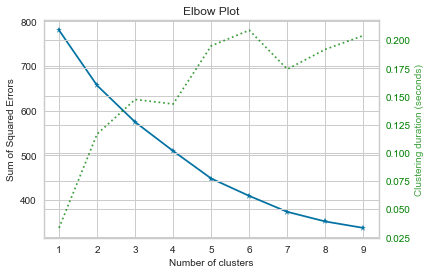

In [381]:
#Elbow method
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, cdp_norm, cluster_ranges=range(1, 10))

In [382]:
#check the cluster number
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

kmeans_model = KMeans(n_clusters=4, random_state=0).fit(cdp_norm)
labels = kmeans_model.labels_
metrics.silhouette_score(cdp_norm, labels, metric='euclidean')

0.19561991433507195

In [383]:
#adapted from http://scikit-learn.org/stable/modules/clustering.html
#test to find best number of clusters
tests = [2, 3, 4, 5, 8]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(cdp_norm)
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(cdp_norm, labels, metric='euclidean'))

0.18736566309019445
0.17393387957777878
0.19561991433507195
0.19124612809870295
0.20362643543471723


The best number of clusters to use would be 4. 

In [384]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [385]:
k_means.fit(cdp_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [386]:
# cluster labels

k_means.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [387]:
# find out cluster centers

k_means.cluster_centers_

array([[ 2.52071823e-02,  1.58167909e-01,  2.21397157e-02,
         1.98626831e-02,  2.42487370e-02,  5.44217300e-03,
         5.40468590e-02,  5.71233374e-02,  8.73323753e-03,
         2.96015218e-04,  4.49518762e-02, -1.89725820e-02,
         8.63548883e-02,  1.69437716e-01,  1.02382051e-02,
         5.70776575e-03,  4.37063267e-02,  2.12791807e-02,
         1.16147226e-01],
       [ 2.52071823e-02, -8.06709262e-02,  6.24151785e-03,
         4.21060453e-03, -1.27552912e-02, -1.99136353e-03,
        -2.10073249e-02, -1.58914499e-02, -3.60630012e-03,
        -4.05955702e-03, -1.56220593e-02,  4.88273454e-02,
        -5.45388097e-02, -1.75227817e-01, -4.32056849e-03,
        -2.94422031e-03, -2.09577673e-02,  5.39738043e-04,
         9.53747663e-02],
       [ 2.52071823e-02, -6.71311593e-02, -3.27452037e-02,
        -3.24896606e-02, -8.67472904e-03, -3.06302762e-03,
        -2.96604514e-02, -4.23787200e-02, -4.42659653e-03,
         5.23234995e-03, -3.12300691e-02, -4.50381753e-02,
    

In [388]:
# convert cluster lables to dataframe

ccdf = pd.DataFrame(k_means.labels_, columns = ['cluster'])
ccdf.head()

cluster
0        0
1        0
2        0
3        0
4        0

In [389]:
# join cdp_norm & ccdf

df2 = cdp_norm.join(ccdf)
df2.head()

color       NCR  duration       DFB  Actor3FB  Actor1FB     gross  \
0  0.025207  0.685566  0.234794 -0.040162  0.000287 -0.011622  0.923486   
1  0.025207  0.166454  0.204077 -0.015684  0.006592  0.049315  0.330326   
3  0.025207  0.796540  0.187012  0.916360  0.963113  0.029003  0.512739   
5  0.025207  0.363741  0.077797 -0.019510 -0.013843 -0.012185  0.019551   
6  0.025207  0.277428  0.159708 -0.040162  0.137026  0.024315  0.365994   

   VotedUsers  CastTotalFB  FacePoster  UserReviews        CR    budget  \
0    0.459805    -0.011830   -0.032908     0.582136 -0.065003  0.651410   
1    0.214205     0.054431   -0.032908     0.192687 -0.065003  0.861410   
3    0.612576     0.143370   -0.032908     0.506434 -0.065003  0.694743   
5    0.060912    -0.016339   -0.009652     0.085460 -0.065003  0.740410   
6    0.162027     0.050937   -0.032908     0.335085 -0.065003  0.721410   

   title_year  Actor2FB  aspect_ratio   MovieFB    profit  imdb_category  \
0    0.144692 -0.009399     -0.021958  0.067329  0.709788       0.110267   
1    0.089136  0.020265      0.016504 -0.027227 -0.010094       0.110267   
3    0.228025  0.151652      0.016504  0.442687  0.254175       0.443600   
5    0.228025 -0.011618      0.016504  0.041541 -0.290212       0.110267   
6    0.089136  0.064061      0.016504 -0.027227  0.086702       0.110267   

   cluster  
0      0.0  
1      0.0  
3      0.0  
5      0.0  
6      0.0

In [390]:
df2.groupby(['cluster']).mean() 

color       NCR  duration       DFB  Actor3FB  Actor1FB     gross  \
cluster                                                                         
0.0      0.013955  0.058929  0.021874  0.008834  0.014367  0.001745  0.050372   
1.0     -0.007490 -0.009705  0.005274  0.010468  0.002368  0.002195 -0.006230   
2.0      0.009104  0.009029  0.007218 -0.002024 -0.001661  0.001103  0.010253   
3.0     -0.029338 -0.029130 -0.004114  0.017832  0.029034 -0.000446  0.010330   

         VotedUsers  CastTotalFB  FacePoster  UserReviews        CR    budget  \
cluster                                                                         
0.0        0.027234     0.003803   -0.000985     0.025302 -0.057268  0.118047   
1.0        0.001811     0.002572   -0.001034    -0.001105 -0.007442 -0.015739   
2.0        0.007257     0.001269    0.002331     0.002749 -0.023538  0.018996   
3.0        0.000965     0.001882    0.003033     0.012082 -0.060458  0.009906   

         title_year  Actor2FB  aspect_ratio   MovieFB    profit  imdb_category  
cluster                                                                         
0.0        0.039285  0.005300      0.003838  0.015417  0.004053       0.010877  
1.0       -0.010621  0.001909      0.000224 -0.002254 -0.000022      -0.004174  
2.0        0.005132  0.001157      0.003004  0.001219  0.002938       0.001840  
3.0       -0.050258  0.002768     -0.000721 -0.006705  0.006839      -0.077612

In [391]:
df2.groupby(['cluster']).size() 

cluster
0.0    711
1.0    734
2.0    621
3.0     55
dtype: int64

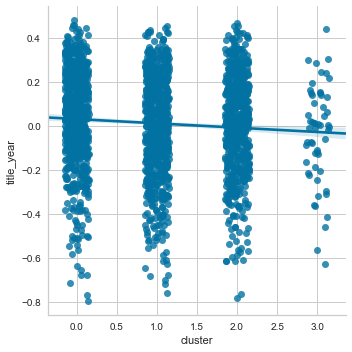

In [392]:
#visualization
sns.lmplot('cluster', 'title_year', df2, x_jitter=.15, y_jitter=.15)

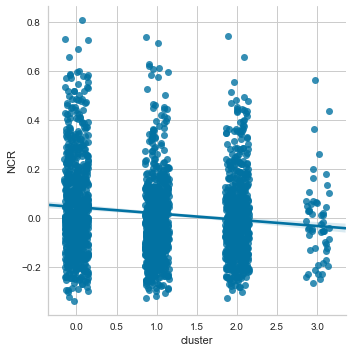

In [393]:
#visualization
sns.lmplot('cluster', 'NCR', df2, x_jitter=.15, y_jitter=.15)

In [394]:
#not normalized
df3 = cdp.join(ccdf)
df3.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  aspect_ratio  MovieFB       profit  imdb_category  \
0      2009.0     936.0          1.78    33000  523505847.0              2   
1      2007.0    5000.0          2.35        0    9404152.0              2   
3      2012.0   23000.0          2.35   164000  198130642.0              3   
5      2012.0     632.0          2.35    24000 -190641321.0              2   
6      2007.0   11000.0          2.35        0   78530303.0              2   

   cluster  
0      0.0  
1      0.0  
3      0.0  
5      0.0  
6      0.0

In [395]:
#not normalized
df3.groupby('cluster').size()

cluster
0.0    711
1.0    734
2.0    621
3.0     55
dtype: int64

In [396]:
#not normalized
df3.groupby('cluster').mean()

color         NCR    duration          DFB     Actor3FB  \
cluster                                                               
0.0      0.988748  214.797468  115.614627  1126.909986  1178.843882   
1.0      0.967302  159.134877  110.750681  1164.476839   902.852861   
2.0      0.983897  174.328502  111.320451   877.164251   810.199678   
3.0      0.945455  143.381818  108.000000  1333.854545  1516.163636   

            Actor1FB         gross     VotedUsers   CastTotalFB  FacePoster  \
cluster                                                                       
0.0      9555.030942  9.649785e+07  155300.694796  15100.824191    1.372714   
1.0      9842.844687  5.345197e+07  112342.547684  14292.490463    1.370572   
2.0      9144.346216  6.598691e+07  121545.587762  13436.671498    1.515298   
3.0      8153.109091  6.604581e+07  110914.090909  13839.545455    1.545455   

         UserReviews        CR        budget   title_year     Actor2FB  \
cluster                                                                  
0.0       457.483826  2.030942  7.699125e+07  2005.205345  2949.745429   
1.0       334.347411  2.230245  3.685544e+07  2003.408719  2485.235695   
2.0       352.318841  2.165862  4.727601e+07  2003.975845  2382.138486   
3.0       395.836364  2.018182  4.454909e+07  2001.981818  2602.909091   

         aspect_ratio       MovieFB        profit  imdb_category  
cluster                                                           
0.0          2.162293  14882.777778  1.950660e+07       1.701828  
1.0          2.108733   8715.585831  1.659653e+07       1.656676  
2.0          2.149936   9927.665056  1.871091e+07       1.674718  
3.0          2.094727   7162.309091  2.149672e+07       1.436364

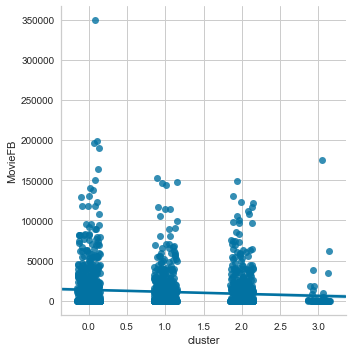

In [397]:
#visualization
#not normalized
sns.lmplot('cluster', 'MovieFB', df3, x_jitter=.15, y_jitter=.15)

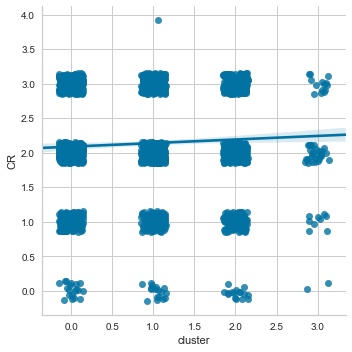

In [398]:
#visualization
#not normalized
sns.lmplot('cluster', 'CR', df3, x_jitter=.15, y_jitter=.15)

### Evaluation
-	Variables that are not significant: color, Faces on Posters, CR, aspect ratio, budget 
-	Cluster 0: high NCR, low DFB, high duration, low Actor3FB, low Actor1FB, high gross, high voted users, low Cast Total FB, high User Reviews, high title year (2009), low Actor2FB, low MovieFB, high profit
-	Cluster 1: low NCR, high duration, low DFB, low Actor3FB, high Actor1FB, low gross, low voted users, high Cast Total FB, low User Reviews, low title year (2007), low Actor2FB, low MovieFB, low profit
-	Cluster 2: high NCR, low duration, high DFB, high Actor3FB, high Actor1FB, high gross, high voted users, high Cast Total FB , high User Reviews, high title year (2012), high Actor2FB, high MovieFB, high profit
-	Cluster 3: low NCR, low duration, low DFB, low Actor3FB, low Actor1FB, low gross, low voted users, low Cast Total FB, low User Reviews, high title year (2012), low Actor2FB, low MovieFB, low profit
-	Cluster 4: low NCR, low duration, low DFB, low Actor3FB, high Actor1FB, low gross, low voted users, high Cast Total FB, high user reviews, low title year (2007), Low Actor2FB, low MovieFB, low profit

### K-Means Hierarchical

In [399]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [400]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([3, 1, 3, ..., 2, 2, 2])

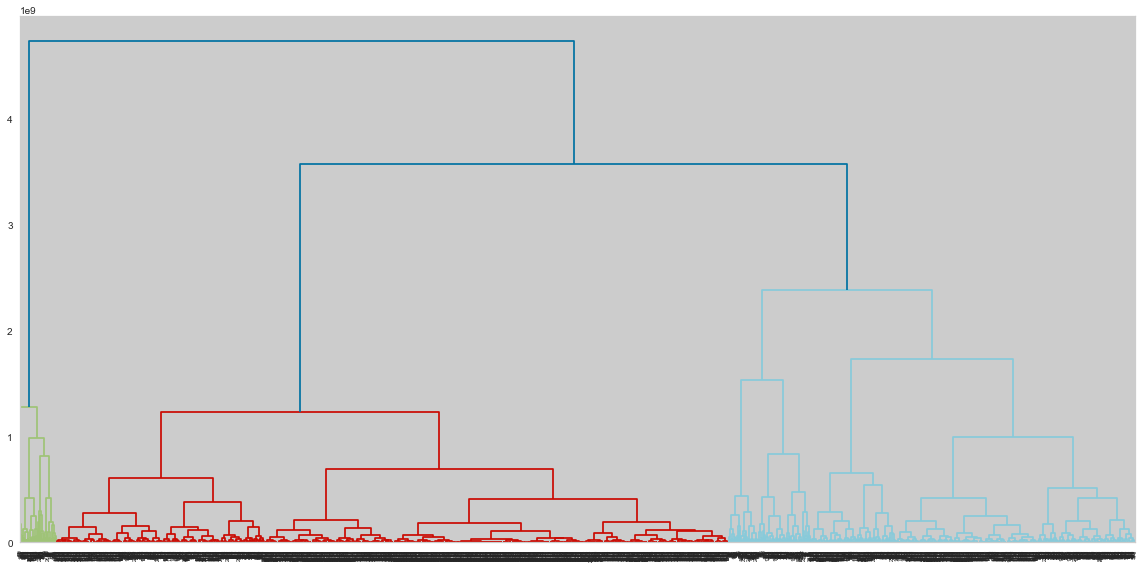

In [401]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top") #orientation top to bottom 
plt.tight_layout() # fixes margins

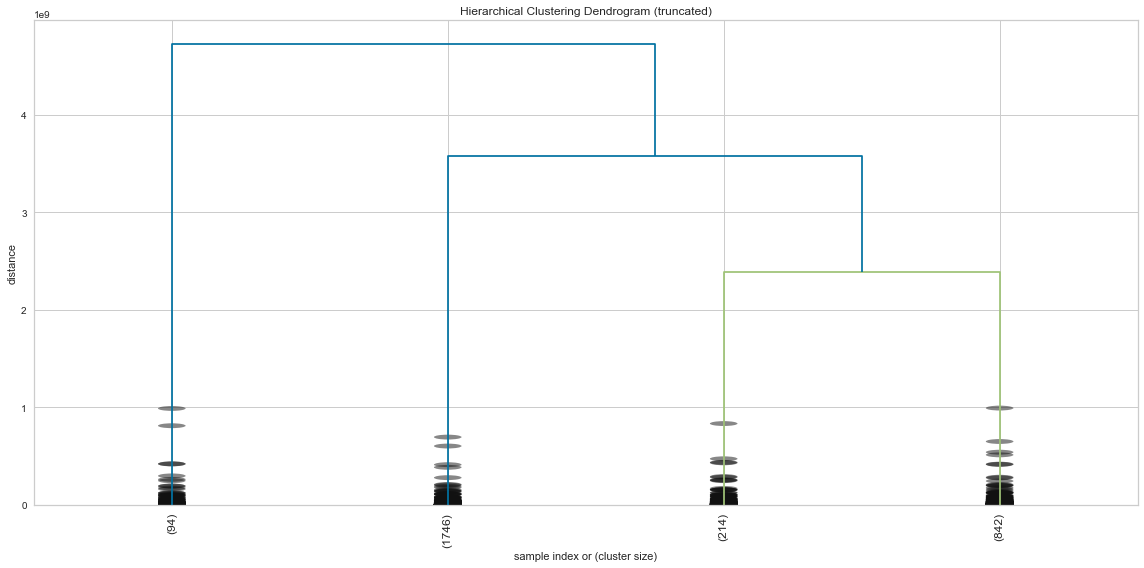

In [402]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [403]:
#To add cluster label into the dataset as a column
df4 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df4.head()

cluster
0        3
1        1
2        3
3        1
4        1

In [404]:
df5 = cdp.join(df4)
df5.head()

color    NCR  duration      DFB  Actor3FB  Actor1FB        gross  \
0      1  723.0     178.0      0.0     855.0    1000.0  760505847.0   
1      1  302.0     169.0    563.0    1000.0   40000.0  309404152.0   
3      1  813.0     164.0  22000.0   23000.0   27000.0  448130642.0   
5      1  462.0     132.0    475.0     530.0     640.0   73058679.0   
6      1  392.0     156.0      0.0    4000.0   24000.0  336530303.0   

   VotedUsers  CastTotalFB  FacePoster  UserReviews  CR       budget  \
0      886204         4834         0.0       3054.0   2  237000000.0   
1      471220        48350         0.0       1238.0   2  300000000.0   
3     1144337       106759         0.0       2701.0   2  250000000.0   
5      212204         1873         1.0        738.0   2  263700000.0   
6      383056        46055         0.0       1902.0   2  258000000.0   

   title_year  Actor2FB  aspect_ratio  MovieFB       profit  imdb_category  \
0      2009.0     936.0          1.78    33000  523505847.0              2   
1      2007.0    5000.0          2.35        0    9404152.0              2   
3      2012.0   23000.0          2.35   164000  198130642.0              3   
5      2012.0     632.0          2.35    24000 -190641321.0              2   
6      2007.0   11000.0          2.35        0   78530303.0              2   

   cluster  
0      3.0  
1      1.0  
3      1.0  
5      1.0  
6      3.0

In [405]:
df5.groupby('cluster').mean()

color         NCR    duration          DFB     Actor3FB  \
cluster                                                               
0.0      0.976599  175.109204  113.954758  1010.538222   909.808112   
1.0      0.989011  334.725275  122.895604  1815.637363  2559.917582   
2.0      0.977851  158.398687  109.698934   967.328138   776.029532   
3.0      0.987342  245.784810  119.341772  1476.784810  1168.392405   

             Actor1FB         gross     VotedUsers   CastTotalFB  FacePoster  \
cluster                                                                        
0.0       9947.308892  6.808202e+07  119952.460218  14288.258970    1.238690   
1.0      14598.054945  1.709991e+08  277682.236264  25051.862637    1.280220   
2.0       8291.790812  5.488895e+07  106799.906481  12296.259229    1.551272   
3.0      12716.088608  1.364819e+08  213183.911392  20574.291139    1.139241   

         UserReviews        CR        budget   title_year     Actor2FB  \
cluster                                                                  
0.0       363.624025  2.127925  5.419279e+07  2003.789392  2316.975039   
1.0       804.401099  1.780220  1.487896e+08  2008.697802  5586.401099   
2.0       316.834290  2.211649  3.511427e+07  2003.534044  2163.425759   
3.0       576.430380  1.936709  1.136671e+08  2005.835443  5123.772152   

         aspect_ratio       MovieFB        profit  imdb_category  
cluster                                                           
0.0          2.136459   9154.241810  1.388923e+07       1.644306  
1.0          2.232473  32548.065934  2.220957e+07       1.840659  
2.0          2.124028   8656.472518  1.977468e+07       1.651354  
3.0          2.158861  15114.493671  2.281477e+07       1.810127

In [406]:
df5.groupby('cluster').size()

cluster
0.0     641
1.0     182
2.0    1219
3.0      79
dtype: int64

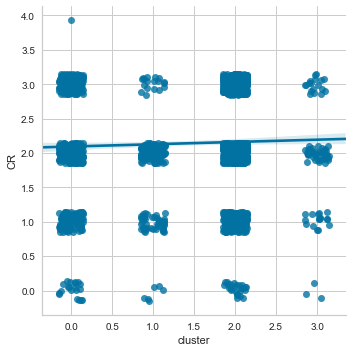

In [407]:
#visualization
sns.lmplot('cluster', 'CR', df5, x_jitter=.15, y_jitter=.15)

### Evaluation
- Used 5 variables again
- Variables that are not significant: color, duration, FacePoster, CR, aspect ratio, profit
- Cluster 0: high NCR, high DFB, high Actor3FB, high Actor1FB, high gross, high voted users, high cast total FB, high user reviews, high budget, high title year (2008), high Actor2FB, high movieFB, low profit
- Cluster 1: high NCR, high DFB, low Actor3FB, high Actor1FB, low gross, high voted users, low cast total FB, low user reviews, low budget, low title year (2003), low Actor2FB, low movieFB, high profit 
- Cluster 2: low NCR, low DFB, low Actor3FB, low Actor1FB, low gross, low voted users, low cast total FB, low user reviews, low budget, low title year (2003), low Actor2FB, low movieFB, low profit
- Cluster 3: low NCR, low DFB, high Actor3FB, low Actor1FB, low gross, high voted users, low cast total FB, low user reviews, low budget, low title year (2003), low Actor2FB, high movieFB, high profit
- Cluster 4: low NCR, high DFB, high Actor3FB, low Actor1FB, low gross, high voted users, low cast total FB, low user reviews, low budget, low title year (2001), low Actor2FB, low movie FB 

## Story Telling
#### Important Variables
- The variables that are most important to predicting imdb_score and movie success are:
- from regression model: duration, NCR and CR
- from Classification model: Voted users, Duration and budget
- from Clustering: 

### Overall Regression Evaluation
- Looking at the regression models I used the best one seems to be the lasso regression model for all variables. It has the highest r-squared value and highest MSE. The variables that are most likely to impact IMDB score from this model are duration, NCR and CR. 

### Overall Classification Evaluation
- The Random Forester is the best model for evaluation. The variables that are determined to be the best for determinind IMDB score are Voted Users, Duration and Budget. 



#### Recommendations
- I would recommend movie producers:
- I would recommend movie investors: 
- I would recommend movie viewers: 

#### Additional Variables
- In order to improve hte model prediction I would like to see the following variables:

#### Other Suggestions